# 주제 선정 계기

In [1]:
import datetime
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image
warnings.filterwarnings('ignore')\

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
# 실제 본인들 카드 데이터

j_soo_money = pd.DataFrame({
                            "지출 금액" : [230000, 455895, 152960, 264920, 351233],
                            "월" : ["1월", "2월", "3월", "4월", "5월"]})

y_soo_money = pd.DataFrame({
                            "지출 금액" : [200000, 505861, 237360, 274550, 353900],
                            "월" : ["1월", "2월", "3월", "4월", "5월"]})

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


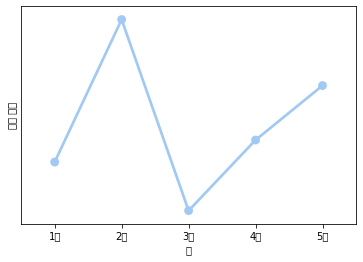

In [3]:
sns.set_palette("pastel")
sns.pointplot(data=j_soo_money, x="월", y="지출 금액").set(yticks=[])
plt.savefig('j_money.jpg', bbox_inches='tight')
plt.show()

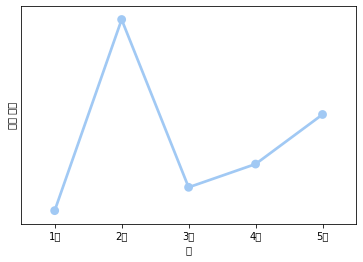

In [4]:
sns.set_palette("pastel")
sns.pointplot(data=y_soo_money, x="월", y="지출 금액").set(yticks=[])
plt.savefig('y_money.jpg', bbox_inches='tight')
plt.show()

# 본 데이터 전처리

## 데이터 훑어보기

In [2]:
dat = pd.read_csv("./datas/funda_train.csv")

In [3]:
dat .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [4]:
dat

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571


In [5]:
dat[dat["amount"]<0]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
41,0,40,a,2016-06-10,17:26,2,NaN,기타 미용업,-8571.428571
347,0,285,a,2016-08-04,17:52,0,NaN,기타 미용업,-1857.142857
731,0,473,g,2016-10-17,10:32,0,NaN,기타 미용업,-2000.000000
831,0,230,b,2016-11-03,15:36,0,NaN,기타 미용업,-85.714286
944,0,138,a,2016-11-28,13:21,0,NaN,기타 미용업,-57.142857
...,...,...,...,...,...,...,...,...,...
6556242,2136,4663626,b,2019-02-01,21:19,0,제주 제주시,기타 주점업,-13428.571429
6556448,2136,4663760,d,2019-02-15,00:46,0,제주 제주시,기타 주점업,-6928.571429
6556485,2136,4663779,b,2019-02-18,02:45,0,제주 제주시,기타 주점업,-5571.428571
6556489,2136,4663780,d,2019-02-18,21:43,0,제주 제주시,기타 주점업,-8571.428571


## 전국 데이터 중 서울만 추출

In [6]:
#서울 뽑기 위해 일단 non값 제거
data = dat.dropna(subset=["region"])

In [7]:
# region column에서 "서울 "이 포함된 데이터만 seoul_df에 저장  
# => 단어가 포함된 행의 데이터를 TRUE 값으로 받는 것
keyword = data["region"].str.contains("서울")
seoul_df = data[keyword]

# resion column에 "서울"이 포함된 DataFrame의 index를 reset
seoul_df.reset_index(inplace =True)

In [8]:
seoul_df.dtypes

index                 int64
store_id              int64
card_id               int64
card_company         object
transacted_date      object
transacted_time      object
installment_term      int64
region               object
type_of_business     object
amount              float64
dtype: object

## 서울 데이터 중 업종 컬럼의 결측치 처리

In [9]:
# type_of_business의 nan값 = seoul_non_biz
seoul_non_biz = pd.isnull(seoul_df["type_of_business"])


In [10]:
seoul_df[seoul_non_biz].groupby("region")["amount"].sum().sort_values(ascending= False)

region
서울 강남구     1.674056e+09
서울 마포구     7.470067e+08
서울 송파구     6.651276e+08
서울 서초구     5.189677e+08
서울 영등포구    4.635349e+08
서울 동작구     3.415456e+08
서울 용산구     3.380083e+08
서울 광진구     3.268393e+08
서울 성동구     1.983764e+08
서울 구로구     1.796704e+08
서울 서대문구    1.454082e+08
서울 노원구     1.338780e+08
서울 중구      1.302206e+08
서울 은평구     9.373864e+07
서울 강동구     9.103937e+07
서울 동대문구    8.970664e+07
서울 강서구     8.750990e+07
서울 강북구     6.801789e+07
서울 종로구     5.181430e+07
서울 중랑구     3.723261e+07
서울 금천구     3.598893e+07
서울 양천구     2.705001e+07
서울 성북구     1.336056e+07
Name: amount, dtype: float64

In [11]:
seoul_df[~seoul_non_biz].groupby("region")["amount"].sum().sort_values(ascending= False)

region
서울 광진구     1.578706e+09
서울 강남구     4.907061e+08
서울 서초구     4.347459e+08
서울 마포구     3.244297e+08
서울 강서구     2.527718e+08
서울 성북구     1.335757e+08
서울 송파구     1.302626e+08
서울 중구      1.199213e+08
서울 금천구     9.516713e+07
서울 영등포구    7.819754e+07
서울 서대문구    7.509724e+07
서울 동작구     7.037101e+07
서울 노원구     6.296486e+07
서울 강동구     4.920029e+07
서울 성동구     4.590462e+07
서울 용산구     4.311701e+07
서울 종로구     4.129861e+07
서울 구로구     2.823086e+07
서울 은평구     2.218343e+07
서울 관악구     2.010843e+07
서울 양천구     1.966960e+07
서울 동대문구    1.826110e+07
서울 강북구     5.337199e+06
서울 중랑구     2.437453e+06
Name: amount, dtype: float64

In [12]:
# type_of_business의 nan값 제외하고 새롭게 dataframe 선언
seoul_ex_biz = seoul_df.dropna(subset=['type_of_business'])
seoul_ex_biz.reset_index(inplace =True)

In [13]:
# type_of_business의 nan값 개수
print(len(seoul_df[seoul_non_biz]))

# type_of_business의 true값 개수
print(len(seoul_ex_biz))

# seoul_df의 row 개수
print(len(seoul_df))

503702
200735
704437


## 환불값(refund) 정리

In [14]:
seoul_ex_biz[seoul_ex_biz['amount'] <= 0]  # 2936개의 - 값이 존재

,level_0,index,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
30,5860,37614,12,31834,c,2016-08-03,16:53,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,-142.857143
49,5879,37633,12,31849,a,2016-09-05,19:37,5,서울 종로구,배관 및 냉ㆍ난방장치 도매업,-70714.285714
66,5896,37650,12,31865,a,2016-09-28,15:01,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,-785.714286
89,5919,37673,12,31885,e,2016-10-28,20:56,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,-142.857143
94,5924,37678,12,31887,b,2016-11-09,08:49,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,-134404.285714
...,...,...,...,...,...,...,...,...,...,...,...
200505,660394,5357180,1766,3815621,g,2018-11-28,16:39,10,서울 중구,의복 소매업,-192857.142857
200509,660398,5357184,1766,3815625,c,2018-11-29,15:38,6,서울 중구,의복 소매업,-22857.142857
200650,660539,5357325,1766,3815727,a,2019-02-11,19:40,0,서울 중구,의복 소매업,-8714.285714
200719,660608,5357394,1766,3815776,h,2019-02-26,17:43,0,서울 중구,의복 소매업,-57142.857143


In [15]:
# 환불값 가장 최근으로 하기 위해 연월일+시간 합치기
seoul_ex_biz['date'] = seoul_ex_biz['transacted_date'] + ' ' + seoul_ex_biz['transacted_time']
seoul_ex_biz['date'] = pd.to_datetime(seoul_ex_biz['date'])

In [17]:
seoul_ex_biz.dtypes

level_0                      int64
index                        int64
store_id                     int64
card_id                      int64
card_company                object
transacted_date             object
transacted_time             object
installment_term             int64
region                      object
type_of_business            object
amount                     float64
date                datetime64[ns]
dtype: object

In [18]:
def remove_negative(data):
    data_pos = data[data.amount > 0]
    data_neg = data[data.amount < 0]
    drop_ind = set()
    minus_ind = set()
    
    for neg in data_neg.itertuples():   #intertuples : 각 row를 하나씩 적용하는 함수
        amount = abs(neg.amount)
        
        row = data_pos[data_pos.store_id == neg.store_id]
        row = row[row.card_id == neg.card_id]
        row = row[row.card_company == neg.card_company]
        row = row[row.amount >= amount]
        row = row[row.date <= neg.date]
        row = row[~row.index.isin(drop_ind)] # drop_ind는 이미 제거한거니까 빼주기
        row = row[~row.index.isin(minus_ind)]
        
        if len(row[row.amount == amount]) > 0:   # 같은 amount인게 있고, 1개 이상
            row = row[row.amount == amount]
            matched_row = row[row.date == max(row.date)].head(1)  # 최근 딱 1개 값!
            # 충격적이게도 같은날 같은 시간에 같은 금액을 결제하고 한개만 환불한 사건이 몇십개였다
            
            drop_ind.update(matched_row.index)  # 뺄 값은 drop_ind에 저장 
                                                # 다음 row 돌릴 때는 없애야하니까            
        elif len(row[row.amount > amount]) > 0:  # amount가 똑같은게 없으면
            a_matched_row = row[row.date == max(row.date)].head(1) # 가장최근 값에서
            data_pos.loc[matched_row.index, 'amount'] += neg.amount # 이만큼 빼주기
                                                                    # neg.amount(음수)
            minus_ind.update(a_matched_row.index)
            
    data_pos.drop(drop_ind, axis = 0, inplace = True)  # 똑같은 금액으로 환불했던 것들 최종 제거
    print('Count - with negative: {}'.format(len(data)))
    print('Count - without negative: {}'.format(len(data_pos)))
    print('non smae index : {}'.format(minus_ind))

    return data_pos


In [19]:
seoul = remove_negative(seoul_ex_biz)

Count - with negative: 200735
Count - without negative: 194868
non smae index : set()


## target 데이터인 액수 데이터(amount) 단위 반올림

### amount column의 액수 단위 반올림
- 소수 둘째까지 반올림한 이유
    - amount 컬럼의 매출 단위가 KW(원)이 아님
    - 따라서 가장 보편적으로 이용되는 소수 2째자리 반올림을 이용하고자 함

In [20]:
seoul

,level_0,index,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,date
0,5830,37584,12,31804,a,2016-06-04,16:28,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,642.857143,2016-06-04 16:28:00
1,5831,37585,12,31805,h,2016-06-06,12:23,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,6285.714286,2016-06-06 12:23:00
2,5832,37586,12,31806,b,2016-06-07,14:01,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,3661.428571,2016-06-07 14:01:00
3,5833,37587,12,31807,a,2016-06-08,09:17,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,3771.428571,2016-06-08 09:17:00
4,5834,37588,12,31808,b,2016-06-09,15:08,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,1000.000000,2016-06-09 15:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...
200728,660617,5357403,1766,3815781,b,2019-02-28,11:41,0,서울 중구,의복 소매업,5428.571429,2019-02-28 11:41:00
200731,660620,5357406,1766,3815782,c,2019-02-28,12:25,4,서울 중구,의복 소매업,221428.571429,2019-02-28 12:25:00
200732,660621,5357407,1766,3815783,b,2019-02-28,17:12,0,서울 중구,의복 소매업,4000.000000,2019-02-28 17:12:00
200733,660622,5357408,1766,3815784,e,2019-02-28,20:08,0,서울 중구,의복 소매업,2857.142857,2019-02-28 20:08:00


In [21]:
# sales_or : amount column의 original dataframe
# sales : amount column data를 소수점 두번째자리까지 반올림한 dataframe

sales_or = seoul.copy()

sales = seoul.copy()
sales["amount"] = round(sales["amount"],2)
sales

,level_0,index,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,date
0,5830,37584,12,31804,a,2016-06-04,16:28,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,642.86,2016-06-04 16:28:00
1,5831,37585,12,31805,h,2016-06-06,12:23,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,6285.71,2016-06-06 12:23:00
2,5832,37586,12,31806,b,2016-06-07,14:01,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,3661.43,2016-06-07 14:01:00
3,5833,37587,12,31807,a,2016-06-08,09:17,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,3771.43,2016-06-08 09:17:00
4,5834,37588,12,31808,b,2016-06-09,15:08,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,1000.00,2016-06-09 15:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...
200728,660617,5357403,1766,3815781,b,2019-02-28,11:41,0,서울 중구,의복 소매업,5428.57,2019-02-28 11:41:00
200731,660620,5357406,1766,3815782,c,2019-02-28,12:25,4,서울 중구,의복 소매업,221428.57,2019-02-28 12:25:00
200732,660621,5357407,1766,3815783,b,2019-02-28,17:12,0,서울 중구,의복 소매업,4000.00,2019-02-28 17:12:00
200733,660622,5357408,1766,3815784,e,2019-02-28,20:08,0,서울 중구,의복 소매업,2857.14,2019-02-28 20:08:00


## 환불 데이터 모아두기

In [22]:
seoul_refund = seoul_ex_biz[seoul_ex_biz["amount"]<0]

In [23]:
seoul_refund["amount"] = abs(seoul_ex_biz["amount"])

In [21]:
seoul_refund.to_csv("~/Desktop//seoul_refund.csv", index=False)

## 최종 데이터 저장

In [90]:
sales.to_csv("~/Desktop//seoul_final.csv", index = False)

# 본 데이터 분석

## 시간대별 분석

In [24]:
dt = pd.read_csv("seoul_final.csv")

In [25]:
# 내가 필요하지 않은 level, date 버리기
dt.drop(["level_0","date"], axis=1, inplace=True)

In [26]:
dt.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194868 entries, 0 to 194867
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             194868 non-null  int64  
 1   store_id          194868 non-null  int64  
 2   card_id           194868 non-null  int64  
 3   card_company      194868 non-null  object 
 4   transacted_date   194868 non-null  object 
 5   transacted_time   194868 non-null  object 
 6   installment_term  194868 non-null  int64  
 7   region            194868 non-null  object 
 8   type_of_business  194868 non-null  object 
 9   amount            194868 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 14.9+ MB


In [27]:
# 년월일시간을 datetime으로 변환
dt["date"] = dt["transacted_date"] + " " + dt["transacted_time"]
dt["date"] = pd.to_datetime(dt.date)

In [28]:
# transacted_time 을 시간대로만 나타내기
ls = list(dt["transacted_time"])
ls = list(map(lambda x: x[0:2], ls))
dt["transacted_time"] = ls

In [29]:
# time으로 이름 변환
dt.rename(columns={"transacted_time":"time"}, inplace=True) 

In [30]:
# tracsaction date는 이제 필요 없음
dt.drop(columns="transacted_date", axis=0, inplace=True)

In [31]:
dt.tail()

,index,store_id,card_id,card_company,time,installment_term,region,type_of_business,amount,date
194863,5357403,1766,3815781,b,11,0,서울 중구,의복 소매업,5428.57,2019-02-28 11:41:00
194864,5357406,1766,3815782,c,12,4,서울 중구,의복 소매업,221428.57,2019-02-28 12:25:00
194865,5357407,1766,3815783,b,17,0,서울 중구,의복 소매업,4000.00,2019-02-28 17:12:00
194866,5357408,1766,3815784,e,20,0,서울 중구,의복 소매업,2857.14,2019-02-28 20:08:00
194867,5357409,1766,3815784,e,20,0,서울 중구,의복 소매업,18285.71,2019-02-28 20:33:00


## 시간대별 나누기
- 오전 / 오후 / 저녁 / 새벽
    - 오전 : 6 - 12
    - 오후 : 12 - 18
    - 저녁 : 18 - 00
    - 새벽 00 - 6


In [32]:
dt["time"].unique()

array(['16', '12', '14', '09', '15', '17', '11', '10', '18', '20', '13',
       '19', '08', '07', '21', '22', '00', '01', '23', '02', '03', '04',
       '05', '06'], dtype=object)

In [33]:
# 시간대별 리스트 지정
a = ['06','07','08','09','10','11']
b = ['12','13','14','15','16','17']
c = ['18','19','20','21','22','23']
d = ['00','01','02', '03','04','05']
dt_time1 = dt

In [34]:
# 시간대 4개로 나누는 함수

def time_change1(data):
    
    if data in a :
        data = "오전"
    elif data in b :
        data = "오후"
    elif data in c :
        data = "저녁"
    elif data in d :
        data = "새벽"
        
    return data

In [35]:
dt_time1["time"] = dt_time1["time"].apply(time_change1)

In [36]:
# 시간대별 거래 총 금액
# 오후>저녁>오전>새벽 순서로 많은 거래 금액
time_amount = pd.Series(dt_time1.groupby("time")["amount"].sum().sort_values(ascending=False)\
                        .values, index=["오후", "저녁", "오전", "새벽"] )
time_amount

오후    2.257992e+09
저녁    1.124042e+09
오전    6.650758e+08
새벽    9.587116e+07
dtype: float64

In [37]:
# 시간대별 거래 건수
# 오후>저녁>새벽>오전 순서로 많은 거래량
time_count = pd.Series(dt_time1.groupby("time")["amount"].count().sort_values(ascending=False)\
                       .values, index=["오후", "저녁", "새벽", "오전"])
time_count

# 거래량은 오히려 새벽이 많은데, 거래 금액은 최하?
# 밑에 살펴보니 새벽은 대부분 음식이나 주점 등으로 소매 산업이기 때문인듯하다

오후    85627
저녁    80335
새벽    14734
오전    14172
dtype: int64

In [38]:
# 시간대별 평균 거래 금액
dt_time1.groupby("time")["amount"].mean().sort_values(ascending=False)
# 왜 오전이 평균 거래금액이 이렇게 높을까..?

time
오전    46928.857679
오후    26370.090151
저녁    13991.938728
새벽     6506.797563
Name: amount, dtype: float64

In [39]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
plt.rcParams['font.family'] = 'AppleGothic'

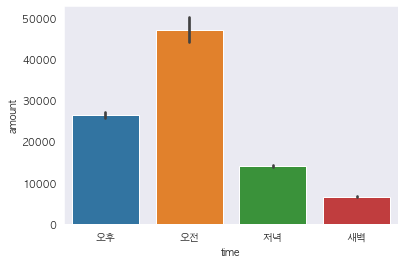

In [40]:
sns.barplot(data=dt_time1, x="time", y="amount")
plt.savefig("시간대별 매출량")

In [41]:
# 업종별 거래 건수
dt_time1["type_of_business"].value_counts()

한식 음식점업                   31409
간이음식 포장 판매 전문점            12978
전자상거래 소매업                  9304
의복 소매업                     8038
당구장 운영업                    7963
안경 및 렌즈 소매업                7861
속옷 및 잠옷 소매업                7776
일식 음식점업                    7050
가정용 세탁업                    7012
김밥 및 기타 간이 음식점업            6717
기타 외국식 음식점업                6707
화장품, 비누 및 방향제 소매업          5798
기타 주점업                     5262
두발 미용업                     5150
기타 미용업                     5024
신발 소매업                     4573
건강보조식품 소매업                 4349
의약품 도매업                    4297
일반 교과 학원                   3872
가정용 직물제품 소매업               3564
그 외 기타 분류 안된 사업지원 서비스업     3540
외국어학원                      2922
악기 도매업                     2882
신발 도매업                     2670
기타 예술학원                    2442
기타 교육지원 서비스업               2253
문구용품, 회화용품, 사무용품·· 도매업     2216
유아용 의류 도매업                 2113
골프연습장 운영업                  1984
운동 및 경기용품 도매업              1755
독서실 운영업                    1724
남녀용 겉옷 및

In [42]:
# 업종별 거래 총 금액
dt_time1.groupby("type_of_business")["amount"].sum().sort_values(ascending=False)

type_of_business
의약품 도매업                   1.568540e+09
일반 교과 학원                  2.539858e+08
외국어학원                     1.853859e+08
기타 교육지원 서비스업              1.776961e+08
한식 음식점업                   1.410543e+08
속옷 및 잠옷 소매업               1.287733e+08
간이음식 포장 판매 전문점            1.237415e+08
여행사업                      1.203246e+08
일식 음식점업                   1.146921e+08
안경 및 렌즈 소매업               1.073696e+08
가전제품 소매업                  1.067326e+08
의복 소매업                    9.826083e+07
경영 컨설팅업                   9.516713e+07
그 외 기타 창작 및 예술관련 서비스업     8.905819e+07
남녀용 겉옷 및 셔츠 도매업           6.264772e+07
가정용 직물제품 소매업              5.286220e+07
기타 예술학원                   5.101545e+07
화장품, 비누 및 방향제 소매업         5.069080e+07
기타 주점업                    4.748542e+07
신발 도매업                    4.590462e+07
두발 미용업                    4.523708e+07
골프연습장 운영업                 4.503729e+07
기타 외국식 음식점업               4.311701e+07
건강보조식품 소매업                4.162011e+07
운동 및 경기용품 도매업             3.705526e+07
신발 소매업  

In [43]:
# 시간대별 / 업종별 거래 총 금액
dt_time1.pivot_table(index="type_of_business", columns="time", values = "amount", aggfunc = sum, fill_value=0)

time,새벽,오전,오후,저녁
type_of_business,,,,
가전제품 소매업,0.00,1.657557e+07,7.674271e+07,1.341429e+07
가정용 세탁업,0.00,3.869573e+06,8.283493e+06,9.354636e+06
가정용 직물제품 소매업,142928.57,4.808257e+06,2.002499e+07,2.788603e+07
간이음식 포장 판매 전문점,19987156.79,2.153366e+07,2.624851e+07,5.597218e+07
건강보조식품 소매업,28571.43,3.310186e+06,2.248264e+07,1.579871e+07
경영 컨설팅업,0.00,2.992277e+07,5.960579e+07,5.638571e+06
골프연습장 운영업,91928.57,1.032823e+07,1.905063e+07,1.556650e+07
그 외 기타 분류 안된 사업지원 서비스업,1142.86,6.630857e+05,1.398542e+07,5.019957e+06
그 외 기타 창작 및 예술관련 서비스업,0.00,6.675859e+06,2.706523e+07,5.531710e+07


In [44]:
# 업종별 / 시간대별 횟수
dt_time1["count"] = 1
bt_time_count = dt_time1.pivot_table(index="type_of_business",
                                     columns="time", values = "count",
                                     aggfunc = sum , fill_value=0)

In [45]:
# 업종별 / 시간대별 금액
bt_time_amount = dt_time1.pivot_table(index="type_of_business",
                                      columns="time", values = "amount", 
                                      aggfunc = sum , fill_value=0)

## 시간 업종 시각화

In [46]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

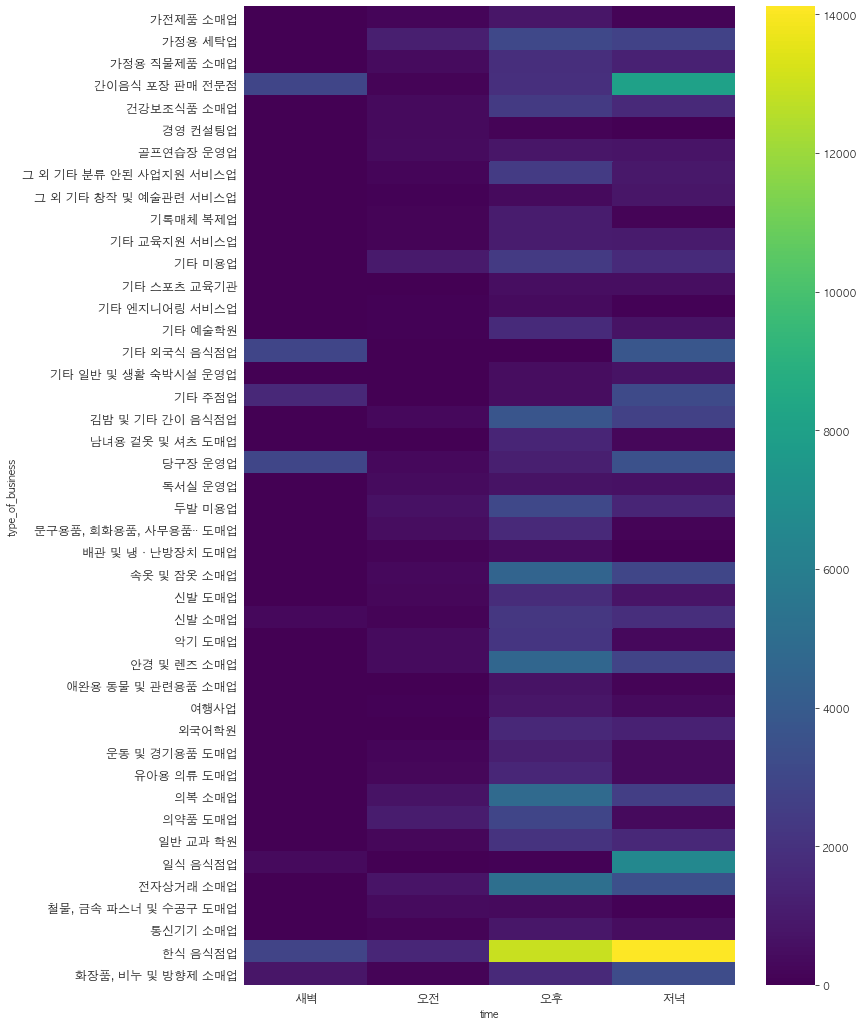

In [47]:
plt.figure(figsize=(11,18))
bt_time_count_jpg = sns.heatmap(bt_time_count, cmap='viridis')
bt_time_count_jpg.set_yticklabels(bt_time_count_jpg.get_ymajorticklabels(), fontsize = 12)
bt_time_count_jpg.set_xticklabels(bt_time_count_jpg.get_xmajorticklabels(), fontsize = 12)
plt.savefig('bt_time_count.jpg', bbox_inches='tight')
# bbox_inches='tight' = 사진 저장할 때 짤리지 않도록 

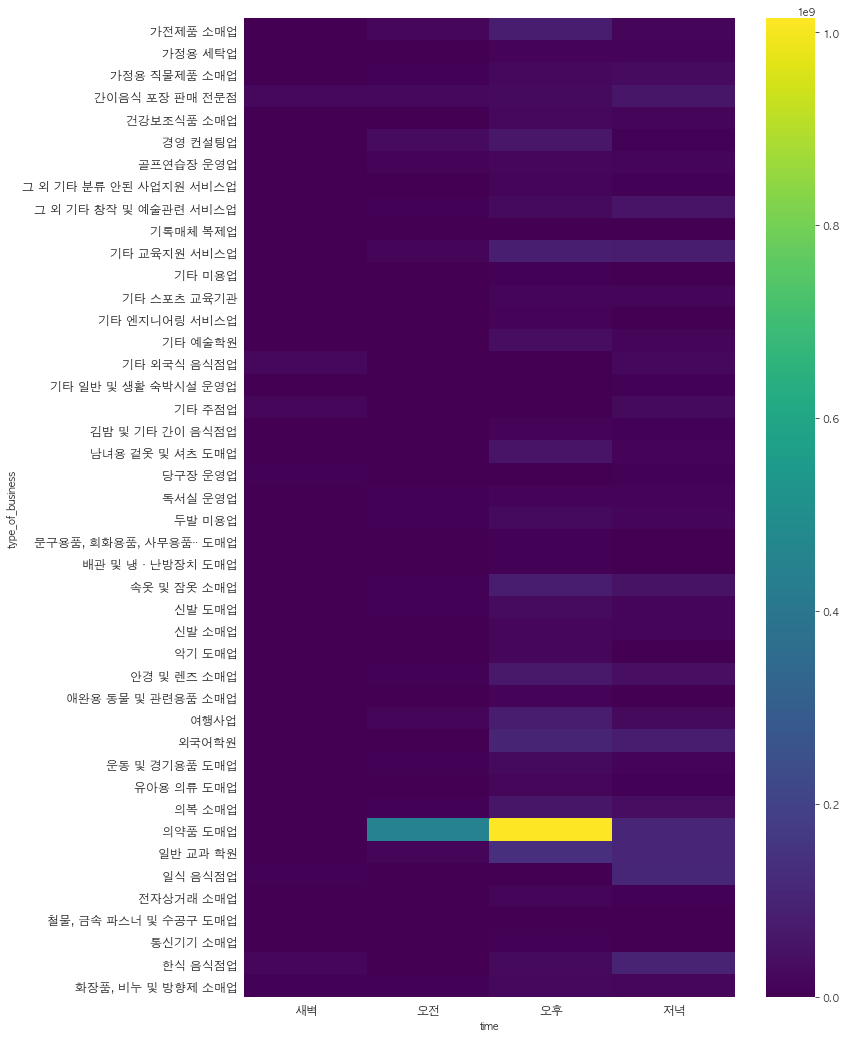

In [48]:
plt.figure(figsize=(11,18))
bt_time_amount_jpg = sns.heatmap(bt_time_amount, cmap='viridis')
bt_time_amount_jpg.set_yticklabels(bt_time_amount_jpg.get_ymajorticklabels(), fontsize = 12)
bt_time_amount_jpg.set_xticklabels(bt_time_amount_jpg.get_xmajorticklabels(), fontsize = 12)
plt.savefig('bt_time_amount.jpg', bbox_inches='tight')

In [49]:
# 업종별 평균 결재 금액
dt_time1.groupby("type_of_business")["amount"].mean().sort_values(ascending=False)

# 역시 의약품 도매업이 최고

type_of_business
의약품 도매업                   365031.454436
경영 컨설팅업                   176562.389425
여행사업                       98626.761615
가전제품 소매업                   98371.033327
기타 교육지원 서비스업               78870.871136
그 외 기타 창작 및 예술관련 서비스업      70290.603733
일반 교과 학원                   65595.496945
외국어학원                      63444.855274
남녀용 겉옷 및 셔츠 도매업            36550.592474
기타 스포츠 교육기관                26038.112931
골프연습장 운영업                  22700.244561
운동 및 경기용품 도매업              21114.106564
기타 예술학원                    20890.846994
기타 엔지니어링 서비스업              18796.664133
신발 도매업                     17192.742719
속옷 및 잠옷 소매업                16560.352366
독서실 운영업                    16325.807216
일식 음식점업                    16268.381254
가정용 직물제품 소매업               14832.267138
배관 및 냉ㆍ난방장치 도매업            13761.096506
애완용 동물 및 관련용품 소매업          13748.281104
안경 및 렌즈 소매업                13658.518592
유아용 의류 도매업                 12530.059342
의복 소매업                     12224.537726
건강보조식품 소매업             

## 날짜별 분석

In [50]:
import datetime
import matplotlib.style as style 
from IPython.display import Image
warnings.filterwarnings('ignore')\

In [51]:
dt = pd.read_csv("seoul_final.csv")

In [52]:
# 필요 없는 컬럼 : level_0 , index, date
dt.drop(["level_0", "index", "date"], axis=1, inplace = True)

In [53]:
# transacted_date + transacted_time -> date (datetime)
dt["date"] = dt.transacted_date + " " + dt.transacted_time
dt["date"] = pd.to_datetime(dt["date"])

### transacted_date 요일로 변환하기
- 1. datetime 함수에는 int만 가능 -> 년, 월, 일 별로 int 변환
- 2. ls_4 리스트에 각 날짜별 요일로 변환한 데이터를 넣음
- 3. week 컬럼을 생성 후 ls_4 숫자로 요일 표현된 것을 한글로 변환 후 데이터 프레임에 넣기
- 4. transacted_time, transacted_date(보류) 컬럼 삭제

In [55]:
ls = list(dt["transacted_date"])
ls_1 = list(map(lambda x: x[0:4], ls)) # 년
ls_2 = list(map(lambda x: x[5:7], ls)) # 월
ls_3 = list(map(lambda x: x[8:], ls)) # 일

ls_1 = list(map(int, ls_1))
ls_2 = list(map(int, ls_2))
ls_3 = list(map(int, ls_3))

In [56]:
ls_4 = list(map(lambda x, y, z: datetime.date(x, y, z).weekday(), ls_1, ls_2, ls_3))

In [57]:
ls_week=[]
for x in ls_4:
    if x == 0:
        ls_week.append("월")
    elif x == 1:
        ls_week.append("화")
    elif x == 2:
        ls_week.append("수")
    elif x == 3:
        ls_week.append("목")
    elif x == 4:
        ls_week.append("금")
    elif x == 5:
        ls_week.append("토")
    elif x == 6:
        ls_week.append("일")

In [58]:
dt.drop(["transacted_time"], axis=1, inplace=True)
dt["week"] = ls_week

### 요일별 매출 영향 확인 / 평일, 주말 별 매출 영향 확인
- 요일별 매출 합 / 매출건 갯수/ 요일별 매출 건당 평균 금액 / 요일별 업종 / 공휴일
- 요일별 매출 합

In [60]:
dt_time1 = dt.copy()
dt_time2 =  dt_time1.groupby("week")["amount"].agg("sum").sort_values(ascending = False).reset_index()
dt_time2

,week,amount
0,화,7.472371e+08
1,수,7.327364e+08
2,목,7.326144e+08
3,금,7.323362e+08
4,월,6.671732e+08
5,토,3.579448e+08
6,일,1.729390e+08


Text(0.5, 1.0, '요일별 총 매출')

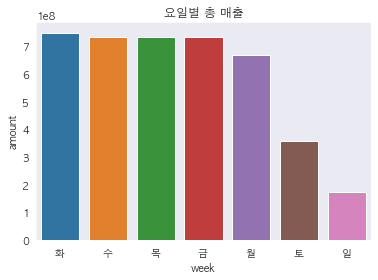

In [61]:
# 요일별 총 매출
sns.barplot(data=dt_time2, x="week", y="amount").set_title("요일별 총 매출")

In [62]:
dt_time2[:5].sum(axis=0) # 평일 매출 합

week           화수목금월
amount    3.6121e+09
dtype: object

In [63]:
dt_time2[5:].sum(axis=0) # 주말 매출 합

week               토일
amount    5.30884e+08
dtype: object

Text(0.5, 1.0, '요일별 매출건 수')

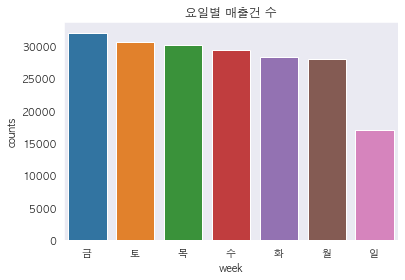

In [64]:
## 요일별 매출건 갯수

dt_time3 = dt_time1.groupby("week").agg("size").sort_values(ascending = False).reset_index(name = "counts")
sns.barplot(data=dt_time3, x="week", y="counts").set_title("요일별 매출건 수")

Text(0.5, 1.0, '요일별 매출 평균')

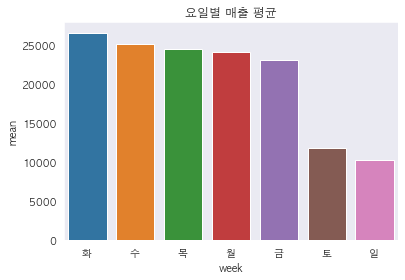

In [65]:
## 요일별 매출건 평균
dt_time4 = dt_time1.groupby("week")["amount"].agg("mean").sort_values(ascending = False).reset_index(name = "mean")
sns.barplot(data=dt_time4, x="week", y="mean").set_title("요일별 매출 평균")

In [66]:
result = pd.merge(dt_time2, dt_time3, how = "outer")
result = pd.merge(result, dt_time4, how = "outer")
# result.counts.sort_values(ascending = False)
result

,week,amount,counts,mean
0,화,7.472371e+08,28232,26467.736952
1,수,7.327364e+08,29332,24980.784142
2,목,7.326144e+08,30064,24368.493287
3,금,7.323362e+08,31953,22919.169459
4,월,6.671732e+08,27845,23960.250544
5,토,3.579448e+08,30448,11755.937578
6,일,1.729390e+08,16994,10176.471438


In [67]:
## data 에서 요일별 업종 보기

In [68]:
type1 = dt_time1[dt_time1.week == "월"]
type1.groupby("type_of_business").agg("size").sort_values(ascending = False).reset_index(name = "Mon_count").head(10)

,type_of_business,Mon_count
0,한식 음식점업,4813
1,간이음식 포장 판매 전문점,1578
2,전자상거래 소매업,1560
3,가정용 세탁업,1190
4,의복 소매업,1190
5,당구장 운영업,1062
6,속옷 및 잠옷 소매업,1034
7,안경 및 렌즈 소매업,988
8,일식 음식점업,983
9,김밥 및 기타 간이 음식점업,887


In [69]:
type2 = dt_time1[dt_time1.week == "화"]
type2.groupby("type_of_business").agg("size").sort_values(ascending = False).reset_index(name = "Tu_count").head(10)

,type_of_business,Tu_count
0,한식 음식점업,5175
1,간이음식 포장 판매 전문점,2092
2,전자상거래 소매업,1338
3,의복 소매업,1275
4,가정용 세탁업,1109
5,일식 음식점업,1101
6,속옷 및 잠옷 소매업,1100
7,당구장 운영업,998
8,김밥 및 기타 간이 음식점업,947
9,의약품 도매업,912


In [70]:
type6 = dt_time1[dt_time1.week == "토"
type6.groupby("type_of_business").agg("size").sort_values(ascending = False).reset_index(name = "Sa_count").head(10)

,type_of_business,Sa_count
0,한식 음식점업,3647
1,간이음식 포장 판매 전문점,1762
2,안경 및 렌즈 소매업,1471
3,기타 외국식 음식점업,1405
4,당구장 운영업,1346
5,의복 소매업,1341
6,가정용 세탁업,1322
7,속옷 및 잠옷 소매업,1288
8,전자상거래 소매업,1271
9,신발 소매업,1262


In [71]:
type7 = dt_time1[dt_time1.week == "일"]
type7.groupby("type_of_business").agg("size").sort_values(ascending = False).reset_index(name = "Su_count").head(10)

,type_of_business,Su_count
0,한식 음식점업,2283
1,기타 미용업,1409
2,안경 및 렌즈 소매업,1330
3,당구장 운영업,1289
4,김밥 및 기타 간이 음식점업,1126
5,신발 소매업,1052
6,속옷 및 잠옷 소매업,793
7,기타 외국식 음식점업,765
8,전자상거래 소매업,752
9,기타 주점업,670


## 계절별 데이터 확인하기

In [73]:
ls_season=[]
for x in ls_2:
    if x == 1 or x == 2 or x == 12:
        ls_season.append("겨울")
    elif x == 3 or x == 4 or x == 5:
        ls_season.append("봄")
    elif x == 6 or x == 7 or x == 8:
        ls_season.append("여름")
    elif x == 9 or x == 10 or x == 11:
        ls_season.append("가을")

In [74]:
dt["season"] = ls_season

### 계절 데이터 프레임

In [75]:
dt_sea = dt.copy()
dt_sea.head()

,store_id,card_id,card_company,transacted_date,installment_term,region,type_of_business,amount,date,week,season
0,12,31804,a,2016-06-04,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,642.86,2016-06-04 16:28:00,토,여름
1,12,31805,h,2016-06-06,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,6285.71,2016-06-06 12:23:00,월,여름
2,12,31806,b,2016-06-07,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,3661.43,2016-06-07 14:01:00,화,여름
3,12,31807,a,2016-06-08,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,3771.43,2016-06-08 09:17:00,수,여름
4,12,31808,b,2016-06-09,0,서울 종로구,배관 및 냉ㆍ난방장치 도매업,1000.00,2016-06-09 15:08:00,목,여름


In [76]:
# 삭제할 날짜 index로 받아서 삭제하기
ind1 = dt_sea[dt_sea["transacted_date"].str.contains("2016")].index
ind2 = dt_sea[dt_sea["transacted_date"].str.contains("2017-01")].index
ind3 =  dt_sea[dt_sea["transacted_date"].str.contains("2017-02")].index

In [77]:
dt_sea.drop(ind1, inplace = True)
dt_sea.drop(ind2, inplace = True)
dt_sea.drop(ind3, inplace = True)

In [78]:
dt_sea[dt_sea["transacted_date"].str.contains("2017-03")].head()

,store_id,card_id,card_company,transacted_date,installment_term,region,type_of_business,amount,date,week,season
793,32,86638,a,2017-03-05,0,서울 마포구,통신기기 소매업,2142.86,2017-03-05 12:39:00,일,봄
794,32,86639,b,2017-03-05,0,서울 마포구,통신기기 소매업,1428.57,2017-03-05 15:31:00,일,봄
795,32,86640,a,2017-03-08,0,서울 마포구,통신기기 소매업,2142.86,2017-03-08 14:24:00,수,봄
796,32,86641,a,2017-03-10,0,서울 마포구,통신기기 소매업,7142.86,2017-03-10 11:34:00,금,봄
797,32,86642,a,2017-03-11,0,서울 마포구,통신기기 소매업,15127.14,2017-03-11 15:14:00,토,봄


In [79]:
dt_sea = dt_sea.sort_values(by = "date")
dt_sea = dt_sea.reset_index(drop = True)

In [80]:
## 지역구별 계절 매출 합

In [81]:
dt_sea_region = dt_sea.pivot_table(index=["region","season"], values="amount", aggfunc="sum").reset_index()
dt_sea_region

,region,season,amount
0,서울 강남구,가을,1.020695e+08
1,서울 강남구,겨울,8.268395e+07
2,서울 강남구,봄,1.023997e+08
3,서울 강남구,여름,9.658966e+07
4,서울 강동구,가을,9.083628e+06
...,...,...,...
91,서울 중구,여름,2.085287e+07
92,서울 중랑구,가을,5.405972e+05
93,서울 중랑구,겨울,4.138615e+05
94,서울 중랑구,봄,6.418215e+05


In [82]:
dt_sea_region1 = dt_sea_region[:4]
dt_sea_region1["count"] = [3,4,1,2]
dt_sea_region1.sort_values(by = "count", inplace = True)
dt_sea_region1

,region,season,amount,count
2,서울 강남구,봄,1.023997e+08,1
3,서울 강남구,여름,9.658966e+07,2
0,서울 강남구,가을,1.020695e+08,3
1,서울 강남구,겨울,8.268395e+07,4


In [83]:
dt_sea_region1 = dt_sea_region[:4]
dt_sea_region1["count"] = [3,4,1,2]
dt_sea_region1.sort_values(by = "count", inplace = True)

In [84]:
dt_sea_region_new1 = dt_sea_region1.iloc[[0,3], :]
dt_sea_region_new1

,region,season,amount,count
2,서울 강남구,봄,1.023997e+08,1
1,서울 강남구,겨울,8.268395e+07,4


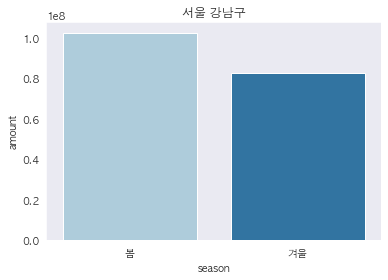

In [86]:
sns.barplot(data=dt_sea_region_new1, x="season", y="amount", palette="Paired").set_title("서울 강남구")
plt.savefig('season_강남구.jpg', bbox_inches='tight')

In [87]:
dt_sea_region2 = dt_sea_region[4:8]
dt_sea_region2["count"] = [3,4,1,2]
dt_sea_region2.sort_values(by = "count", inplace = True)
dt_sea_region2

,region,season,amount,count
6,서울 강동구,봄,10024528.29,1
7,서울 강동구,여름,9822913.68,2
4,서울 강동구,가을,9083628.20,3
5,서울 강동구,겨울,7541657.35,4


In [88]:
dt_sea_region_new2 = dt_sea_region2.iloc[[0,3], :]
dt_sea_region_new2

,region,season,amount,count
6,서울 강동구,봄,10024528.29,1
5,서울 강동구,겨울,7541657.35,4


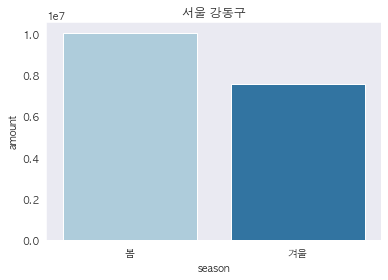

In [89]:
sns.barplot(data=dt_sea_region_new2, x="season", y="amount", palette="Paired").set_title("서울 강동구")
plt.savefig('season_강동구.jpg', bbox_inches='tight')

In [91]:
dt_sea_region3 = dt_sea_region[8:12]
dt_sea_region3["count"] = [3,4,1,2]
dt_sea_region3.sort_values(by = "count", inplace = True)
dt_sea_region3

,region,season,amount,count
10,서울 강북구,봄,965564.21,1
11,서울 강북구,여름,1446407.16,2
8,서울 강북구,가을,1097334.18,3
9,서울 강북구,겨울,583142.87,4


In [92]:
dt_sea_region_new3 = dt_sea_region3.iloc[[0,3], :]
dt_sea_region_new3

,region,season,amount,count
10,서울 강북구,봄,965564.21,1
9,서울 강북구,겨울,583142.87,4


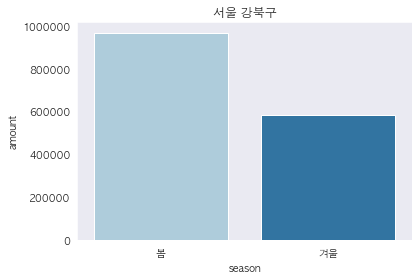

In [93]:
sns.barplot(data=dt_sea_region_new3, x="season", y="amount", 
            palette="Paired").set_title("서울 강북구")
plt.savefig('season_강북구.jpg', bbox_inches='tight')

In [95]:
dt_sea_region4 = dt_sea_region[12:16]
dt_sea_region4["count"] = [3,4,1,2]
dt_sea_region4.sort_values(by = "count", inplace = True)
dt_sea_region4

,region,season,amount,count
14,서울 강서구,봄,52272857.72,1
15,서울 강서구,여름,63910186.75,2
12,서울 강서구,가을,40606645.34,3
13,서울 강서구,겨울,31237685.46,4


In [96]:
dt_sea_region_new4 = dt_sea_region4.iloc[[0,3], :]
dt_sea_region_new4

,region,season,amount,count
14,서울 강서구,봄,52272857.72,1
13,서울 강서구,겨울,31237685.46,4


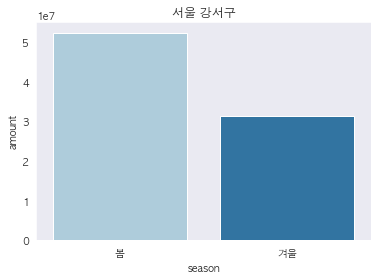

In [97]:
sns.barplot(data=dt_sea_region_new4, x="season", y="amount", 
            palette="Paired").set_title("서울 강서구")
plt.savefig('season_강서구.jpg', bbox_inches='tight')

In [99]:
dt_sea_region5 = dt_sea_region[16:20]
dt_sea_region5["count"] = [3,4,1,2]
dt_sea_region5.sort_values(by = "count", inplace = True)
dt_sea_region5

,region,season,amount,count
18,서울 관악구,봄,4210571.20,1
19,서울 관악구,여름,3386428.40,2
16,서울 관악구,가을,3262285.52,3
17,서울 관악구,겨울,3776571.27,4


In [100]:
dt_sea_region_new5 = dt_sea_region5.iloc[[0,3], :]
dt_sea_region_new5

,region,season,amount,count
18,서울 관악구,봄,4210571.20,1
17,서울 관악구,겨울,3776571.27,4


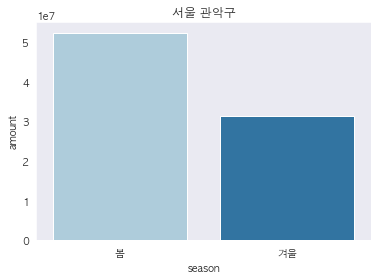

In [101]:
sns.barplot(data=dt_sea_region_new4, x="season", y="amount", 
            palette="Paired").set_title("서울 관악구")
plt.savefig('season_관악구.jpg', bbox_inches='tight')

In [103]:
dt_sea_region6 = dt_sea_region[20:24]
dt_sea_region6["count"] = [3,4,1,2]
dt_sea_region6.sort_values(by = "count", inplace = True)
dt_sea_region6

,region,season,amount,count
22,서울 광진구,봄,3.301356e+08,1
23,서울 광진구,여름,3.175385e+08,2
20,서울 광진구,가을,2.400603e+08,3
21,서울 광진구,겨울,3.007008e+08,4


In [104]:
dt_sea_region_new6 = dt_sea_region6.iloc[[0,3], :]
dt_sea_region_new6

,region,season,amount,count
22,서울 광진구,봄,3.301356e+08,1
21,서울 광진구,겨울,3.007008e+08,4


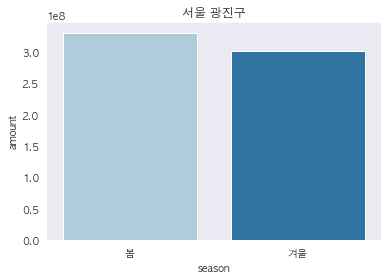

In [105]:
sns.barplot(data=dt_sea_region_new6, x="season", y="amount", 
            palette="Paired").set_title("서울 광진구")
plt.savefig('season_광진구.jpg', bbox_inches='tight')

In [107]:
dt_sea_region7 = dt_sea_region[24:28]
dt_sea_region7["count"] = [3,4,1,2]
dt_sea_region7.sort_values(by = "count", inplace = True)
dt_sea_region7

,region,season,amount,count
26,서울 구로구,봄,6380000.08,1
27,서울 구로구,여름,5290571.33,2
24,서울 구로구,가을,4350571.40,3
25,서울 구로구,겨울,4569142.81,4


In [108]:
dt_sea_region_new7 = dt_sea_region7.iloc[[0,3], :]
dt_sea_region_new7

,region,season,amount,count
26,서울 구로구,봄,6380000.08,1
25,서울 구로구,겨울,4569142.81,4


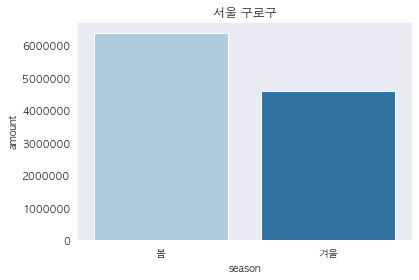

In [109]:
sns.barplot(data=dt_sea_region_new7, x="season", y="amount", 
            palette="Paired").set_title("서울 구로구")
plt.savefig('season_구로구.jpg', bbox_inches='tight')

In [110]:
dt_sea_region8 = dt_sea_region[28:32]
dt_sea_region8["count"] = [3,4,1,2]
dt_sea_region8.sort_values(by = "count", inplace = True)
dt_sea_region8

,region,season,amount,count
30,서울 금천구,봄,16594142.74,1
31,서울 금천구,여름,19682785.55,2
28,서울 금천구,가을,27789599.97,3
29,서울 금천구,겨울,23355656.94,4


In [111]:
dt_sea_region_new8 = dt_sea_region8.iloc[[0,3], :]
dt_sea_region_new8

,region,season,amount,count
30,서울 금천구,봄,16594142.74,1
29,서울 금천구,겨울,23355656.94,4


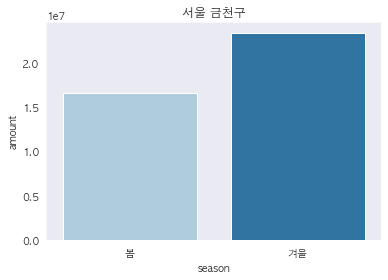

In [112]:
sns.barplot(data=dt_sea_region_new8, x="season", y="amount", 
            palette="Paired").set_title("서울 금천구")
plt.savefig('season_금천구.jpg', bbox_inches='tight')

In [113]:
dt_sea_region9 = dt_sea_region[32:36]
dt_sea_region9["count"] = [3,4,1,2]
dt_sea_region9.sort_values(by = "count", inplace = True)
dt_sea_region9

,region,season,amount,count
34,서울 노원구,봄,16745565.15,1
35,서울 노원구,여름,15757555.79,2
32,서울 노원구,가을,9521007.28,3
33,서울 노원구,겨울,8832576.29,4


In [114]:
dt_sea_region_new9 = dt_sea_region9.iloc[[0,3], :]
dt_sea_region_new9

,region,season,amount,count
34,서울 노원구,봄,16745565.15,1
33,서울 노원구,겨울,8832576.29,4


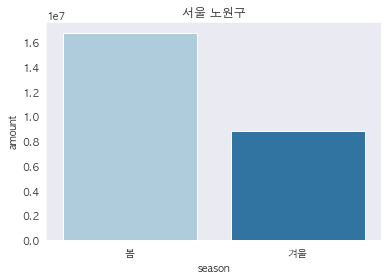

In [115]:
sns.barplot(data=dt_sea_region_new9, x="season", y="amount", 
            palette="Paired").set_title("서울 노원구")
plt.savefig('season_노원구.jpg', bbox_inches='tight')

In [116]:
dt_sea_region10 = dt_sea_region[36:40]
dt_sea_region10["count"] = [3,4,1,2]
dt_sea_region10.sort_values(by = "count", inplace = True)
dt_sea_region10

,region,season,amount,count
38,서울 동대문구,봄,3872100.14,1
39,서울 동대문구,여름,3530028.63,2
36,서울 동대문구,가을,2935985.71,3
37,서울 동대문구,겨울,2892828.68,4


In [117]:
dt_sea_region_new10 = dt_sea_region10.iloc[[0,3], :]
dt_sea_region_new10

,region,season,amount,count
38,서울 동대문구,봄,3872100.14,1
37,서울 동대문구,겨울,2892828.68,4


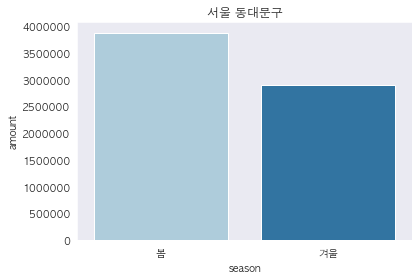

In [118]:
sns.barplot(data=dt_sea_region_new10, x="season", y="amount", 
            palette="Paired").set_title("서울 동대문구")
plt.savefig('season_동대문구.jpg', bbox_inches='tight')

In [119]:
dt_sea_region11 = dt_sea_region[40:44]
dt_sea_region11["count"] = [3,4,1,2]
dt_sea_region11.sort_values(by = "count", inplace = True)
dt_sea_region11

,region,season,amount,count
42,서울 동작구,봄,12650771.42,1
43,서울 동작구,여름,11084457.13,2
40,서울 동작구,가을,10124514.12,3
41,서울 동작구,겨울,12006171.77,4


In [120]:
dt_sea_region_new11 = dt_sea_region11.iloc[[0,3], :]
dt_sea_region_new11

,region,season,amount,count
42,서울 동작구,봄,12650771.42,1
41,서울 동작구,겨울,12006171.77,4


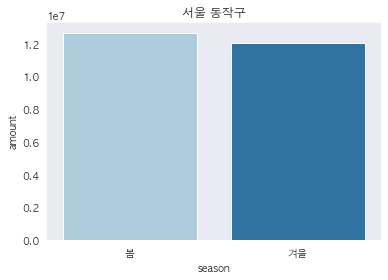

In [121]:
sns.barplot(data=dt_sea_region_new11, x="season", y="amount", 
            palette="Paired").set_title("서울 동작구")
plt.savefig('season_동작구.jpg', bbox_inches='tight')

In [122]:
dt_sea_region12= dt_sea_region[44:48]
dt_sea_region12["count"] = [3,4,1,2]
dt_sea_region12.sort_values(by = "count", inplace = True)
dt_sea_region12

,region,season,amount,count
46,서울 마포구,봄,64005275.24,1
47,서울 마포구,여름,59389952.91,2
44,서울 마포구,가을,54343703.63,3
45,서울 마포구,겨울,52927131.30,4


In [123]:
dt_sea_region_new12 = dt_sea_region12.iloc[[0,3], :]
dt_sea_region_new12

,region,season,amount,count
46,서울 마포구,봄,64005275.24,1
45,서울 마포구,겨울,52927131.30,4


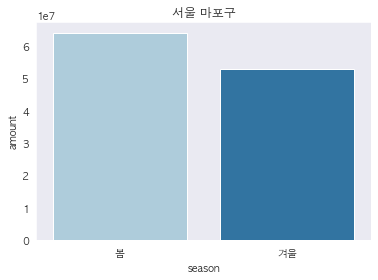

In [124]:
sns.barplot(data=dt_sea_region_new12, x="season", y="amount", 
            palette="Paired").set_title("서울 마포구")
plt.savefig('season_마포구.jpg', bbox_inches='tight')

In [125]:
dt_sea_region13 = dt_sea_region[48:52]
dt_sea_region13["count"] = [3,4,1,2]
dt_sea_region13.sort_values(by = "count", inplace = True)
dt_sea_region13

,region,season,amount,count
50,서울 서대문구,봄,14676048.74,1
51,서울 서대문구,여름,14513242.31,2
48,서울 서대문구,가을,16399513.13,3
49,서울 서대문구,겨울,13079614.45,4


In [126]:
dt_sea_region_new13 = dt_sea_region13.iloc[[0,3], :]
dt_sea_region_new13

,region,season,amount,count
50,서울 서대문구,봄,14676048.74,1
49,서울 서대문구,겨울,13079614.45,4


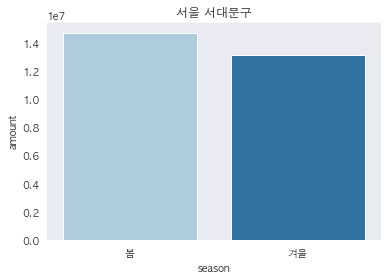

In [127]:
sns.barplot(data=dt_sea_region_new13, x="season", y="amount", 
            palette="Paired").set_title("서울 서대문구")
plt.savefig('season_서대문구.jpg', bbox_inches='tight')

In [129]:
dt_sea_region14 = dt_sea_region[52:56]
dt_sea_region14["count"] = [3,4,1,2]
dt_sea_region14.sort_values(by = "count", inplace = True)
dt_sea_region14

,region,season,amount,count
54,서울 서초구,봄,71921187.32,1
55,서울 서초구,여름,83134023.01,2
52,서울 서초구,가을,73125929.19,3
53,서울 서초구,겨울,67851621.35,4


In [130]:
dt_sea_region_new14 = dt_sea_region14.iloc[[0,3], :]
dt_sea_region_new14

,region,season,amount,count
54,서울 서초구,봄,71921187.32,1
53,서울 서초구,겨울,67851621.35,4


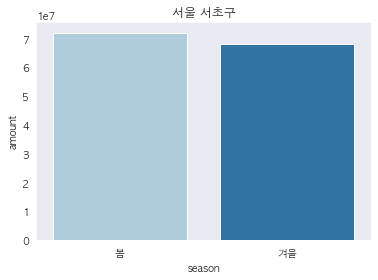

In [131]:
sns.barplot(data=dt_sea_region_new14, x="season", y="amount", 
            palette="Paired").set_title("서울 서초구")
plt.savefig('season_서초구.jpg', bbox_inches='tight')

In [132]:
dt_sea_region15 = dt_sea_region[56:60]
dt_sea_region15["count"] = [3,4,1,2]
dt_sea_region15.sort_values(by = "count", inplace = True)
dt_sea_region15

,region,season,amount,count
58,서울 성동구,봄,10594170.92,1
59,서울 성동구,여름,7510856.88,2
56,서울 성동구,가을,8656738.40,3
57,서울 성동구,겨울,5655571.38,4


In [133]:
dt_sea_region_new15 = dt_sea_region15.iloc[[0,3], :]
dt_sea_region_new15

,region,season,amount,count
58,서울 성동구,봄,10594170.92,1
57,서울 성동구,겨울,5655571.38,4


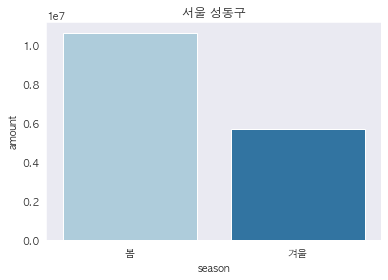

In [134]:
sns.barplot(data=dt_sea_region_new15, x="season", y="amount", 
            palette="Paired").set_title("서울 성동구")
plt.savefig('season_성동구.jpg', bbox_inches='tight')

In [135]:
dt_sea_region16 = dt_sea_region[60:64]
dt_sea_region16["count"] = [3,4,1,2]
dt_sea_region16.sort_values(by = "count", inplace = True)
dt_sea_region16

,region,season,amount,count
62,서울 성북구,봄,23064642.92,1
63,서울 성북구,여름,24983342.69,2
60,서울 성북구,가을,22466857.68,3
61,서울 성북구,겨울,23461359.89,4


In [136]:
dt_sea_region_new16 = dt_sea_region16.iloc[[0,3], :]
dt_sea_region_new16

,region,season,amount,count
62,서울 성북구,봄,23064642.92,1
61,서울 성북구,겨울,23461359.89,4


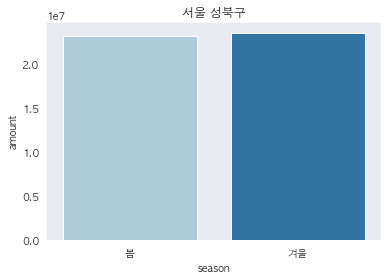

In [137]:
sns.barplot(data=dt_sea_region_new16, x="season", y="amount", 
            palette="Paired").set_title("서울 성북구")
plt.savefig('season_성북구.jpg', bbox_inches='tight')

In [138]:
dt_sea_region17 = dt_sea_region[64:68]
dt_sea_region17["count"] = [3,4,1,2]
dt_sea_region17.sort_values(by = "count", inplace = True)
dt_sea_region17

,region,season,amount,count
66,서울 송파구,봄,21591980.34,1
67,서울 송파구,여름,28406941.92,2
64,서울 송파구,가을,23433402.56,3
65,서울 송파구,겨울,19389529.63,4


In [139]:
dt_sea_region_new17 = dt_sea_region17.iloc[[0,3], :]
dt_sea_region_new17

,region,season,amount,count
66,서울 송파구,봄,21591980.34,1
65,서울 송파구,겨울,19389529.63,4


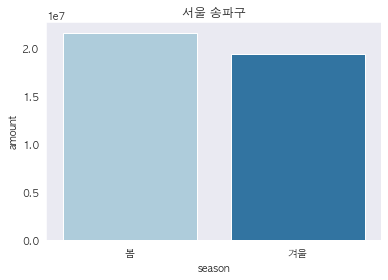

In [140]:
sns.barplot(data=dt_sea_region_new17, x="season", y="amount", 
            palette="Paired").set_title("서울 송파구")
plt.savefig('season_송파구.jpg', bbox_inches='tight')

In [141]:
dt_sea_region18 = dt_sea_region[68:72]
dt_sea_region18["count"] = [3,4,1,2]
dt_sea_region18.sort_values(by = "count", inplace = True)
dt_sea_region18

,region,season,amount,count
70,서울 양천구,봄,4058000.06,1
71,서울 양천구,여름,3016542.80,2
68,서울 양천구,가을,3016042.82,3
69,서울 양천구,겨울,2414230.01,4


In [142]:
dt_sea_region_new18 = dt_sea_region18.iloc[[0,3], :]
dt_sea_region_new18

,region,season,amount,count
70,서울 양천구,봄,4058000.06,1
69,서울 양천구,겨울,2414230.01,4


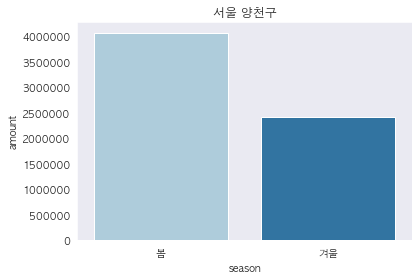

In [143]:
sns.barplot(data=dt_sea_region_new18, x="season", y="amount", 
            palette="Paired").set_title("서울 양천구")
plt.savefig('season_양천구.jpg', bbox_inches='tight')

In [144]:
dt_sea_region19 = dt_sea_region[72:76]
dt_sea_region19["count"] = [3,4,1,2]
dt_sea_region19.sort_values(by = "count", inplace = True)
dt_sea_region19

,region,season,amount,count
74,서울 영등포구,봄,15681499.64,1
75,서울 영등포구,여름,14428892.66,2
72,서울 영등포구,가을,13013428.28,3
73,서울 영등포구,겨울,12801637.09,4


In [145]:
dt_sea_region_new19 = dt_sea_region19.iloc[[0,3], :]
dt_sea_region_new19

,region,season,amount,count
74,서울 영등포구,봄,15681499.64,1
73,서울 영등포구,겨울,12801637.09,4


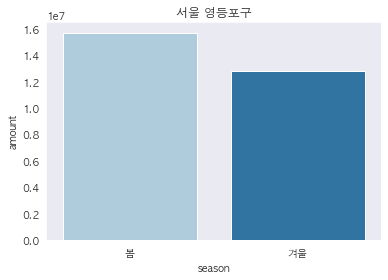

In [146]:
sns.barplot(data=dt_sea_region_new19, x="season", y="amount", 
            palette="Paired").set_title("서울 영등포구")
plt.savefig('season_영등포구.jpg', bbox_inches='tight')

In [148]:
dt_sea_region20 = dt_sea_region[76:80]
dt_sea_region20["count"] = [3,4,1,2]
dt_sea_region20.sort_values(by = "count", inplace = True)
dt_sea_region20

,region,season,amount,count
78,서울 용산구,봄,7188000.14,1
79,서울 용산구,여름,9455314.21,2
76,서울 용산구,가을,8557714.19,3
77,서울 용산구,겨울,6159285.91,4


In [149]:
dt_sea_region_new20 = dt_sea_region20.iloc[[0,3], :]
dt_sea_region_new20

,region,season,amount,count
78,서울 용산구,봄,7188000.14,1
77,서울 용산구,겨울,6159285.91,4


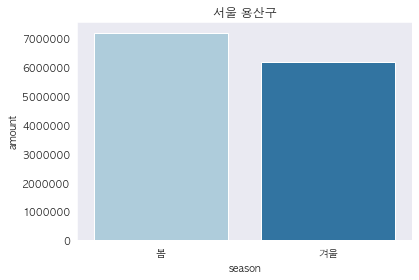

In [150]:
sns.barplot(data=dt_sea_region_new20, x="season", y="amount", 
            palette="Paired").set_title("서울 용산구")
plt.savefig('season_용산구.jpg', bbox_inches='tight')

In [151]:
dt_sea_region21 = dt_sea_region[80:84]
dt_sea_region21["count"] = [3,4,1,2]
dt_sea_region21.sort_values(by = "count", inplace = True)
dt_sea_region21

,region,season,amount,count
82,서울 은평구,봄,4147857.42,1
83,서울 은평구,여름,4280428.78,2
80,서울 은평구,가을,4618571.65,3
81,서울 은평구,겨울,5481428.72,4


In [152]:
dt_sea_region_new21 = dt_sea_region21.iloc[[0,3], :]
dt_sea_region_new21

,region,season,amount,count
82,서울 은평구,봄,4147857.42,1
81,서울 은평구,겨울,5481428.72,4


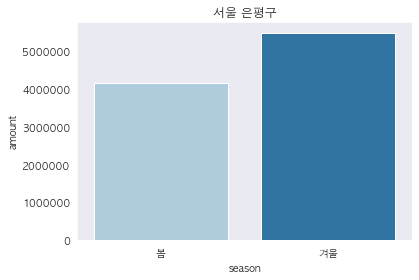

In [153]:
sns.barplot(data=dt_sea_region_new21, x="season", y="amount", 
            palette="Paired").set_title("서울 은평구")
plt.savefig('season_은평구.jpg', bbox_inches='tight')

In [154]:
dt_sea_region22 = dt_sea_region[84:88]
dt_sea_region22["count"] = [3,4,1,2]
dt_sea_region22.sort_values(by = "count", inplace = True)
dt_sea_region22

,region,season,amount,count
86,서울 종로구,봄,6740822.89,1
87,서울 종로구,여름,5914031.43,2
84,서울 종로구,가을,6961469.60,3
85,서울 종로구,겨울,8227854.24,4


In [155]:
dt_sea_region_new22= dt_sea_region22.iloc[[0,3], :]
dt_sea_region_new22

,region,season,amount,count
86,서울 종로구,봄,6740822.89,1
85,서울 종로구,겨울,8227854.24,4


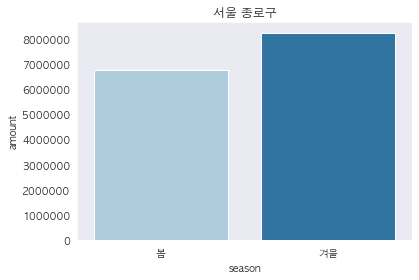

In [156]:
sns.barplot(data=dt_sea_region_new22, x="season", y="amount", 
            palette="Paired").set_title("서울 종로구")
plt.savefig('season_종로구.jpg', bbox_inches='tight')

In [157]:
dt_sea_region23 = dt_sea_region[88:92]
dt_sea_region23["count"] = [3,4,1,2]
dt_sea_region23.sort_values(by = "count", inplace = True)
dt_sea_region23

,region,season,amount,count
90,서울 중구,봄,22978177.45,1
91,서울 중구,여름,20852871.73,2
88,서울 중구,가을,20319399.19,3
89,서울 중구,겨울,20179442.46,4


In [158]:
dt_sea_region_new23 = dt_sea_region23.iloc[[0,3], :]
dt_sea_region_new23

,region,season,amount,count
90,서울 중구,봄,22978177.45,1
89,서울 중구,겨울,20179442.46,4


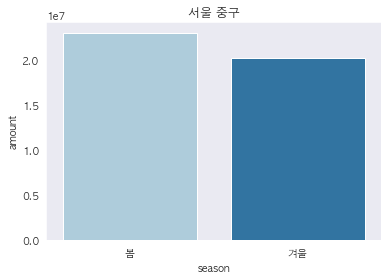

In [159]:
sns.barplot(data=dt_sea_region_new23, x="season", y="amount", 
            palette="Paired").set_title("서울 중구")
plt.savefig('season_중구.jpg', bbox_inches='tight')

In [160]:
dt_sea_region24 = dt_sea_region[92:96]
dt_sea_region24["count"] = [3,4,1,2]
dt_sea_region24.sort_values(by = "count", inplace = True)
dt_sea_region24

,region,season,amount,count
94,서울 중랑구,봄,641821.55,1
95,서울 중랑구,여름,431084.26,2
92,서울 중랑구,가을,540597.20,3
93,서울 중랑구,겨울,413861.47,4


In [161]:
dt_sea_region_new24 = dt_sea_region24.iloc[[0,3], :]
dt_sea_region_new24

,region,season,amount,count
94,서울 중랑구,봄,641821.55,1
93,서울 중랑구,겨울,413861.47,4


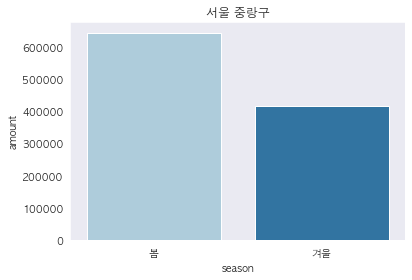

In [162]:
sns.barplot(data=dt_sea_region_new24, x="season", y="amount", 
            palette="Paired").set_title("서울 중랑구")
plt.savefig('season_중랑구.jpg', bbox_inches='tight')

In [163]:
region_all = pd.concat([dt_sea_region_new1, dt_sea_region_new2, dt_sea_region_new3, dt_sea_region_new4,
          dt_sea_region_new5, dt_sea_region_new6, dt_sea_region_new7, dt_sea_region_new8,
          dt_sea_region_new9,dt_sea_region_new10,dt_sea_region_new11,dt_sea_region_new12,
          dt_sea_region_new13,dt_sea_region_new14,dt_sea_region_new15,dt_sea_region_new16,
          dt_sea_region_new17, dt_sea_region_new18, dt_sea_region_new19, dt_sea_region_new20,
          dt_sea_region_new21, dt_sea_region_new22, dt_sea_region_new23, dt_sea_region_new24])

In [164]:
region_all.drop("count", axis=1, inplace=True)

In [165]:
sspring = region_all[region_all["season"]=="봄"]["amount"]
wwinter = region_all[region_all["season"]=="겨울"]["amount"]
wt_idx = region_all[region_all["season"]=="겨울"].index
sp_idx = region_all[region_all["season"]=="봄"].index

In [166]:
region_all["percentage"] = 100
region_all.loc[sp_idx,"percentage"] = list(map(lambda x,y : x/y*100, sspring, wwinter))

In [167]:
region_all

,region,season,amount,percentage
2,서울 강남구,봄,1.023997e+08,123.844684
1,서울 강남구,겨울,8.268395e+07,100.000000
6,서울 강동구,봄,1.002453e+07,132.922086
5,서울 강동구,겨울,7.541657e+06,100.000000
10,서울 강북구,봄,9.655642e+05,165.579356
9,서울 강북구,겨울,5.831429e+05,100.000000
14,서울 강서구,봄,5.227286e+07,167.339087
13,서울 강서구,겨울,3.123769e+07,100.000000
18,서울 관악구,봄,4.210571e+06,111.491904
17,서울 관악구,겨울,3.776571e+06,100.000000


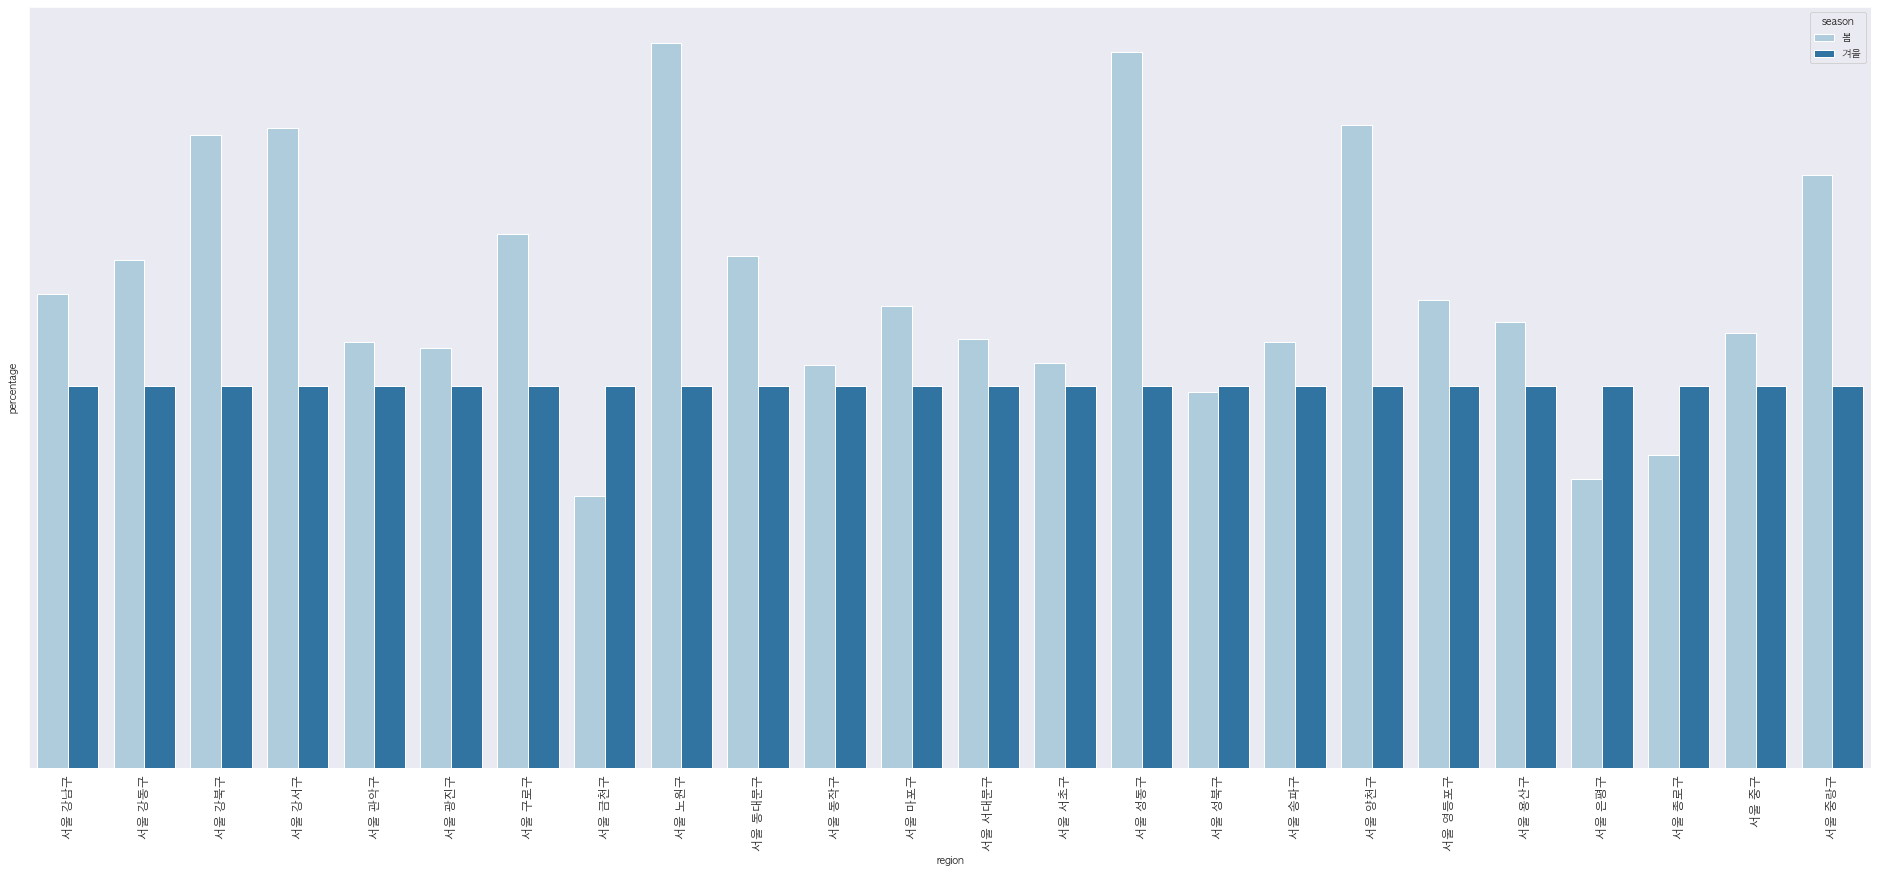

In [168]:
plt.figure(figsize=(33,14))
aaaa = sns.barplot( data = region_all,
    x = "region",
    y = "percentage",
    hue = "season",palette="Paired"             
) 
plt.xticks(rotation=90)
aaaa.set_yticklabels(aaaa.get_ymajorticklabels(), fontsize = 12)
aaaa.set_xticklabels(aaaa.get_xmajorticklabels(), fontsize = 12)
plt.savefig('ddddd.jpg', bbox_inches='tight')

In [169]:
##### 도봉구 없음
## 나중에도 쓰지 말기!!

# 2020 매출

In [5]:
card = pd.read_csv("card.csv")

In [6]:
index = pd.read_csv("index.csv")

In [7]:
idx_all = index[index["sigungu"]=="all"].index

In [10]:
index_dt = index.drop(idx_all)
gu_cgi = index_dt.pivot_table(index=["period","sigungu"], values="cgi",aggfunc="mean")
        

In [12]:
gu_cgi.reset_index(inplace=True)

In [13]:
gu_cgi["period"] = gu_cgi["period"].astype("str")

In [14]:
ls = list(map(lambda x: x[2:], list(gu_cgi["period"])))
ls = list(map(lambda x:int(x), ls))
gu_cgi["period"] = ls

In [15]:
## 겨울 매출량 비교하기 위해 새로운 데이터 프레임 만들기
gu_cgi_new = gu_cgi.pivot_table(index="sigungu", columns="period", values="cgi")

In [16]:
gu_cgi_new = gu_cgi_new.iloc[:,[0,1,12,13]]

In [17]:
gu_cgi_new["19mean"] = (gu_cgi_new[1901]+gu_cgi_new[1902])/2

In [18]:
gu_cgi_new["20mean"] = (gu_cgi_new[2001]+gu_cgi_new[2002])/2

In [19]:
gu_cgi_new["19to20"] = (gu_cgi_new["20mean"]/gu_cgi_new["19mean"])*100

In [20]:
# 아래쪽에서 사용하겠습니다

In [21]:
gu = gu_cgi["sigungu"].unique()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


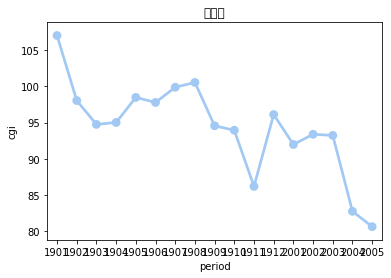

In [22]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu=="강남구"], x="period", y="cgi", fontsize = 1)
plt.title("강남구")
plt.savefig('강남구.jpg', bbox_inches='tight')

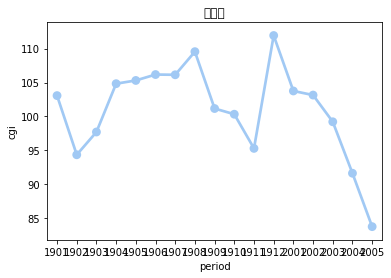

In [23]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[1]], x="period", y="cgi", fontsize = 1)
plt.title(gu[1])
plt.savefig('{}.jpg'.format(gu[1]), bbox_inches='tight')

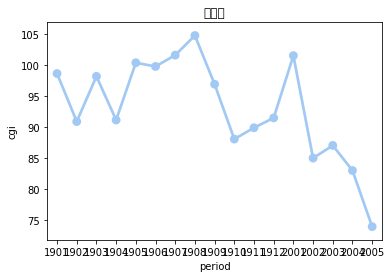

In [24]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[2]], x="period", y="cgi", fontsize = 1)
plt.title(gu[2])
plt.savefig('{}.jpg'.format(gu[2]), bbox_inches='tight')

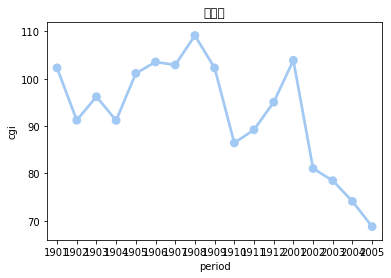

In [25]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[3]], x="period", y="cgi", fontsize = 1)
plt.title(gu[3])
plt.savefig('{}.jpg'.format(gu[3]), bbox_inches='tight')

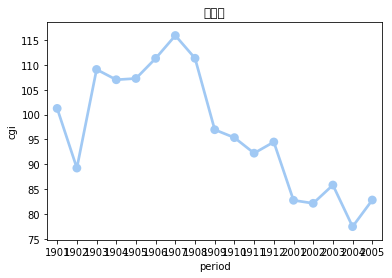

In [26]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[4]], x="period", y="cgi", fontsize = 1)
plt.title(gu[4])
plt.savefig('{}.jpg'.format(gu[4]), bbox_inches='tight')

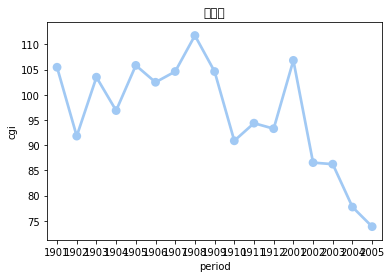

In [27]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[5]], x="period", y="cgi", fontsize = 1)
plt.title(gu[5])
plt.savefig('{}.jpg'.format(gu[5]), bbox_inches='tight')

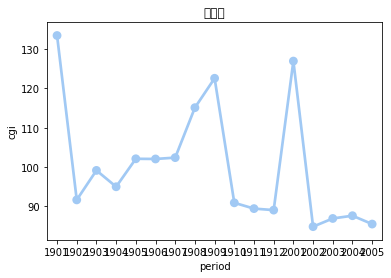

In [28]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[6]], x="period", y="cgi", fontsize = 1)
plt.title(gu[6])
plt.savefig('{}.jpg'.format(gu[6]), bbox_inches='tight')

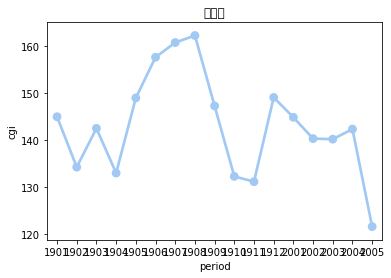

In [29]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[7]], x="period", y="cgi", fontsize = 1)
plt.title(gu[7])
plt.savefig('{}.jpg'.format(gu[7]), bbox_inches='tight')

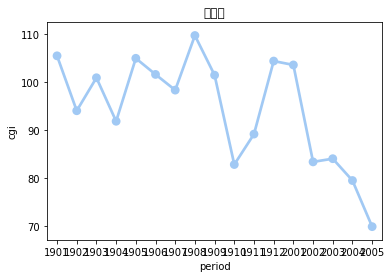

In [30]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[8]], x="period", y="cgi", fontsize = 1)
plt.title(gu[8])
plt.savefig('{}.jpg'.format(gu[8]), bbox_inches='tight')

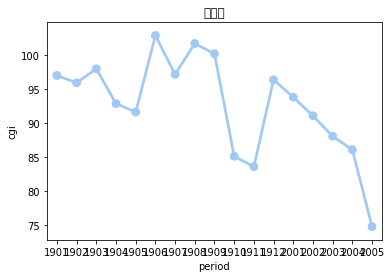

In [31]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[9]], x="period", y="cgi", fontsize = 1)
plt.title(gu[9])
plt.savefig('{}.jpg'.format(gu[9]), bbox_inches='tight')

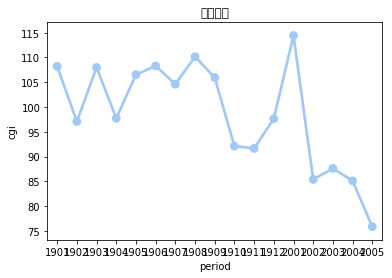

In [32]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[10]], x="period", y="cgi", fontsize = 1)
plt.title(gu[10])
plt.savefig('{}.jpg'.format(gu[10]), bbox_inches='tight')

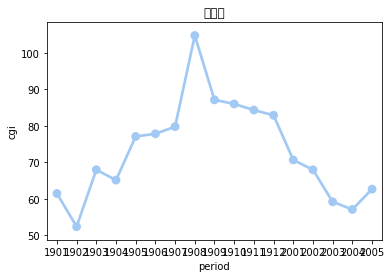

In [33]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[11]], x="period", y="cgi", fontsize = 1)
plt.title(gu[11])
plt.savefig('{}.jpg'.format(gu[11]), bbox_inches='tight')

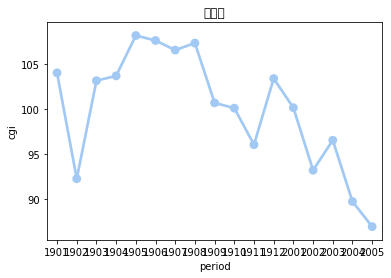

In [34]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[12]], x="period", y="cgi", fontsize = 1)
plt.title(gu[12])
plt.savefig('{}.jpg'.format(gu[12]), bbox_inches='tight')

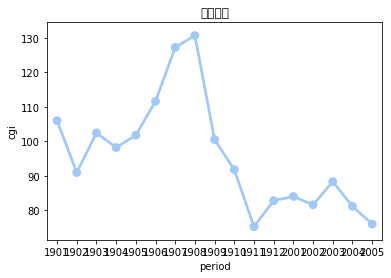

In [35]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[13]], x="period", y="cgi", fontsize = 1)
plt.title(gu[13])
plt.savefig('{}.jpg'.format(gu[13]), bbox_inches='tight')

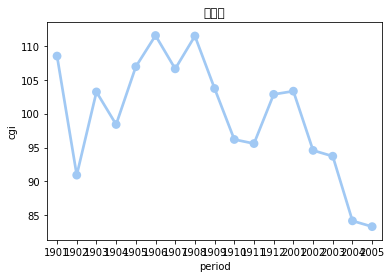

In [36]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[14]], x="period", y="cgi", fontsize = 1)
plt.title(gu[14])
plt.savefig('{}.jpg'.format(gu[14]), bbox_inches='tight')

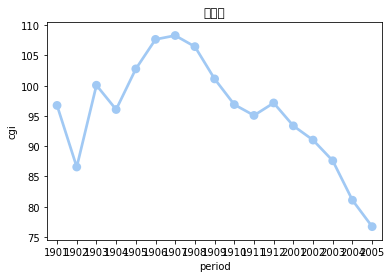

In [37]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[15]], x="period", y="cgi", fontsize = 1)
plt.title(gu[15])
plt.savefig('{}.jpg'.format(gu[15]), bbox_inches='tight')

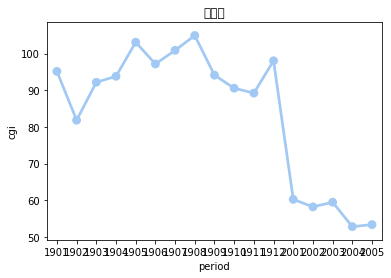

In [38]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[16]], x="period", y="cgi", fontsize = 1)
plt.title(gu[16])
plt.savefig('{}.jpg'.format(gu[16]), bbox_inches='tight')

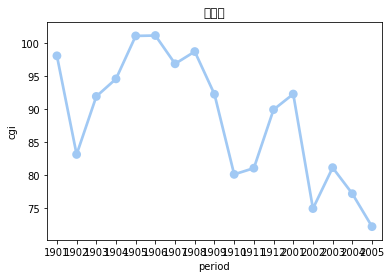

In [39]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[17]], x="period", y="cgi", fontsize = 1)
plt.title(gu[17])
plt.savefig('{}.jpg'.format(gu[17]), bbox_inches='tight')

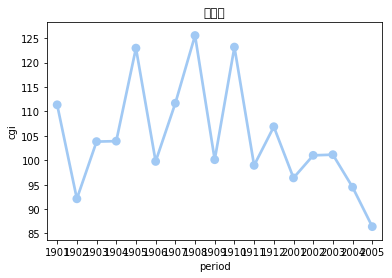

In [40]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[18]], x="period", y="cgi", fontsize = 1)
plt.title(gu[18])
plt.savefig('{}.jpg'.format(gu[18]), bbox_inches='tight')

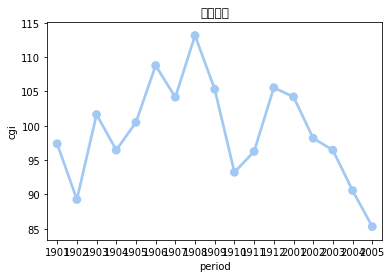

In [41]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[19]], x="period", y="cgi", fontsize = 1)
plt.title(gu[19])
plt.savefig('{}.jpg'.format(gu[19]), bbox_inches='tight')

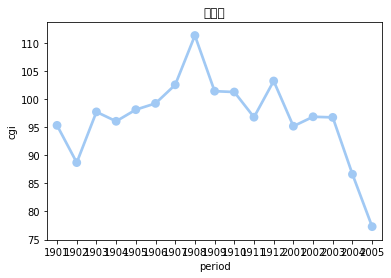

In [42]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[20]], x="period", y="cgi", fontsize = 1)
plt.title(gu[20])
plt.savefig('{}.jpg'.format(gu[20]), bbox_inches='tight')

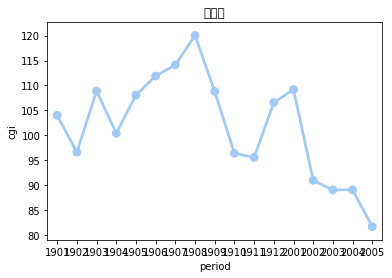

In [43]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[21]], x="period", y="cgi", fontsize = 1)
plt.title(gu[21])
plt.savefig('{}.jpg'.format(gu[21]), bbox_inches='tight')

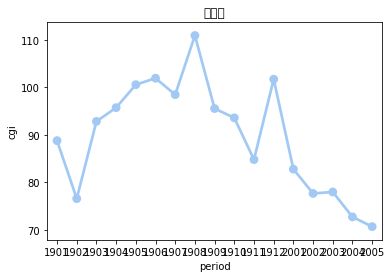

In [44]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[22]], x="period", y="cgi", fontsize = 1)
plt.title(gu[22])
plt.savefig('{}.jpg'.format(gu[22]), bbox_inches='tight')

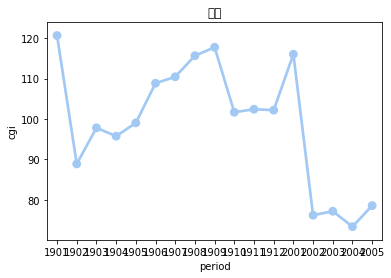

In [45]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[23]], x="period", y="cgi", fontsize = 1)
plt.title(gu[23])
plt.savefig('{}.jpg'.format(gu[23]), bbox_inches='tight')

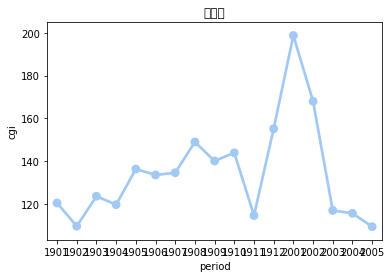

In [46]:
sns.pointplot(data=gu_cgi[gu_cgi.sigungu==gu[24]], x="period", y="cgi", fontsize = 1)
plt.title(gu[24])
plt.savefig('{}.jpg'.format(gu[24]), bbox_inches='tight')

In [47]:
card["dong"] = list(map(lambda x : x[0:2], card["adstrd_nm"]))

In [48]:
gugu = card["dong"].unique()
gugu

array(['성내', '천호', '암사', '고덕', '명일', '상일', '강일', '잠실', '위례', '장지', '문정',
       '가락', '삼전', '석촌', '송파', '오금', '오륜', '방이', '마천', '거여', '풍납', '수서',
       '일원', '세곡', '개포', '도곡', '역삼', '대치', '삼성', '청담', '압구', '논현', '신사',
       '내곡', '양재', '방배', '반포', '잠원', '서초', '난곡', '미성', '대학', '조원', '난향',
       '신림', '서림', '신원', '서원', '남현', '인헌', '중앙', '은천', '청룡', '낙성', '행운',
       '성현', '청림', '보라', '신대', '대방', '사당', '흑석', '상도', '노량', '대림', '신길',
       '양평', '문래', '도림', '당산', '여의', '영등', '시흥', '독산', '가산', '수궁', '오류',
       '개봉', '고척', '가리', '구로', '신도', '방화', '공항', '우장', '발산', '가양', '화곡',
       '등촌', '염창', '신정', '신월', '목5', '목4', '목3', '목2', '목1', '상암', '성산',
       '연남', '망원', '합정', '서교', '서강', '신수', '염리', '대흥', '용강', '도화', '공덕',
       '아현', '북가', '남가', '홍은', '홍제', '연희', '신촌', '충현', '북아', '천연', '진관',
       '수색', '증산', '역촌', '응암', '대조', '구산', '갈현', '불광', '녹번', '상계', '중계',
       '하계', '공릉', '월계', '방학', '쌍문', '도봉', '창5', '창4', '창3', '창2', '창1',
       '인수', '우이', '수유', '번3', '번1', '삼각', '송천', '송

In [49]:
#강동
gu1 = ['성내', '천호', '암사', '고덕', '명일', '상일', '강일', '잠실','둔촌', '길동', '번2', '항동'] 
#송파
gu2 = ["잠실","위례","장지","문정","가락","삼전","석촌","송파","오금", "오륜","방이","마천","거여","풍납"]
#강남
gu3 = gugu[21:32]
# 서초
gu4 = gugu[32:39]
# 관악구
gu5 = ['난곡', '미성', '대학', '조원', '난향','신림', '서림', '신원', '서원', '남현', '인헌', '중앙', '은천', '청룡', '낙성', '행운','성현', '청림', '보라']
# 동작구
gu6 = ['신대', '대방', '사당', '흑석', '상도', '노량']
# 영등포구
gu7 = ['대림', '신길','양평', '문래', '도림', '당산', '여의', '영등']
# 금천구
gu8 = ['시흥', '독산', '가산']
# 구로구
gu9 = ['수궁', '오류','개봉', '고척', '가리', '구로', '신도']
# 강서구
gu10 = ['방화', '공항', '우장', '발산', '가양', '화곡','등촌', '염창']
# 마포구
gu11 = ['상암', '성산','연남', '망원', '합정', '서교', '서강', '신수', '염리', '대흥', '용강', '도화', '공덕','아현']
# 서대문구
gu12 = ['북가', '남가', '홍은', '홍제', '연희', '신촌', '충현', '북아', '천연']
# 은평구
gu13 = ['진관','수색', '증산', '역촌', '응암', '대조', '구산', '갈현', '불광', '녹번']
# 노원구
gu14 = [ '상계', '중계','하계', '공릉', '월계']
# 도봉구
gu15 = ['방학', '쌍문', '도봉', '창5', '창4', '창3', '창2', '창1']
# 강북구 
gu16 = ['인수', '우이', '수유', '번3', '번1', '삼각', '송천', '송중', '미아', '삼양']
# 성북구
gu17 = ['석관','장위', '월곡', '종암', '길음', '정릉', '보문', '안암', '돈암', '동선', '삼선', '성북']
# 중랑구
gu18 = ['신내', '망우', '묵2', '묵1', '중화', '상봉', '면목']
# 동대문구
gu19 = ['이문', '휘경', '회기', '청량','장안', '답십', '전농', '제기', '용신']
# 광진구
gu20 = ['구의', '자양', '광장', '능동', '중곡', '군자','화양']
# 성동구
gu21 = ['용답', '송정', '성수', '옥수', '금호', '응봉', '행당', '사근', '마장', '왕십']
# 용산구
gu22 = ['보광', '서빙', '한남', '이태', '이촌', '한강', '용문', '효창', '원효', '청파', '남영','용산', '후암']
# 중구
gu23 = ['중림', '황학', '동화', '신당', '청구', '약수', '다산', '을지', '광희','장충', '필동', '명동', '회현', '소공']
# 종로구
gu24 = ['숭인', '창신', '혜화', '이화', '종로', '가회', '교남', '무악', '평창', '부암', '삼청', '사직', '청운']
# 양천구
gu25 = ['신정', '신월', '목5', '목4', '목3', '목2', '목1']

In [50]:
def dong_gu(row):
    
    if row in gu1:
        row = "서울 강동구"
    elif row in gu2:
        row = "서울 송파구"
    elif row in gu3:
        row = "서울 강남구"
    elif row in gu4:
        row = "서울 서초구"
    elif row in gu5:
        row = "서울 관악구"
    elif row in gu6:
        row = "서울 동작구"
    elif row in gu7:
        row = "서울 영등포구"
    elif row in gu8:
        row = "서울 금천구"
    elif row in gu9:
        row = "서울 구로구"
    elif row in gu10:
        row = "서울 강서구"
    elif row in gu11:
        row = "서울 마포구"
    elif row in gu12:
        row = "서울 서대문구"
    elif row in gu13:
        row = "서울 은평구"
    elif row in gu14:
        row = "서울 노원구"
    elif row in gu15:
        row = "서울 도봉구"
    elif row in gu16:
        row = "서울 강북구"
    elif row in gu17:
        row = "서울 성북구"
    elif row in gu18:
        row = "서울 중랑구"
    elif row in gu19:
        row = "서울 동대문구"
    elif row in gu20:
        row = "서울 광진구"
    elif row in gu21:
        row = "서울 성동구"
    elif row in gu22:
        row = "서울 용산구"
    elif row in gu23:
        row = "서울 종구"
    elif row in gu24:
        row = "서울 종로구"
    elif row in gu25:
        row = "서울 양천구"
            
    return row

In [51]:
dong = list(card["dong"])
card["dong"] = list(map(dong_gu, dong))

In [52]:
card.drop(columns=["adstrd_code","adstrd_nm", "mrhst_induty_cl_code", "selng_cascnt" ], axis=1, inplace=True)

In [53]:
# 월별
date = list(card["receipt_dttm"])
date = list(map(lambda x : str(x), date))
card["date"] = list(map(lambda x:x[5], date))

In [55]:
card_season = card.copy()

In [56]:
# 6월 삭제
index_6 = card_season[card_season["date"]=='6'].index

In [57]:
card_season.drop(index_6, inplace=True)

In [58]:
# 겨울, 봄 나누기

def split_date(data):

    if data in ['1','2']:
        data = "겨울"
    else :
        data = "봄"
    
    return data

In [59]:
season = list(card_season["date"])

In [60]:
card_season["season"] = list(map(split_date, season))

In [61]:
# 금액에 들어있는 이상한 한글 제거
ind = card_season[card_season["salamt"].str.contains("[가-힣]+")].index

In [62]:
card_season.drop(ind, axis=0, inplace = True)

In [63]:
sal = list(card_season["salamt"])
card_season["salamt"] = list(map(lambda x: int(x), sal))

In [64]:
dong_season_mean = card_season.pivot_table(index=["dong", "season"], values="salamt", aggfunc="mean")

In [65]:
dong_season_mean = dong_season_mean.reset_index()

In [66]:
winter = list(dong_season_mean[dong_season_mean["season"]=="겨울"]['salamt'])
spring = list(dong_season_mean[dong_season_mean["season"]=="봄"]['salamt'])

In [67]:
dong_season_mean.loc[0:49:2,'percentage'] = 100

In [68]:
dong_season_mean.loc[1:49:2,'percentage'] = list(map(lambda x, y : round(x/y*100,2), spring, winter))

In [69]:
# 도봉구 삭제
dong_season_mean.drop([18,19], inplace=True)
dong_season_mean.reset_index(inplace=True)

In [70]:
dt1 = dong_season_mean.loc[0:15]
dt2 = dong_season_mean.loc[16:31]
dt3 = dong_season_mean.loc[32:45]

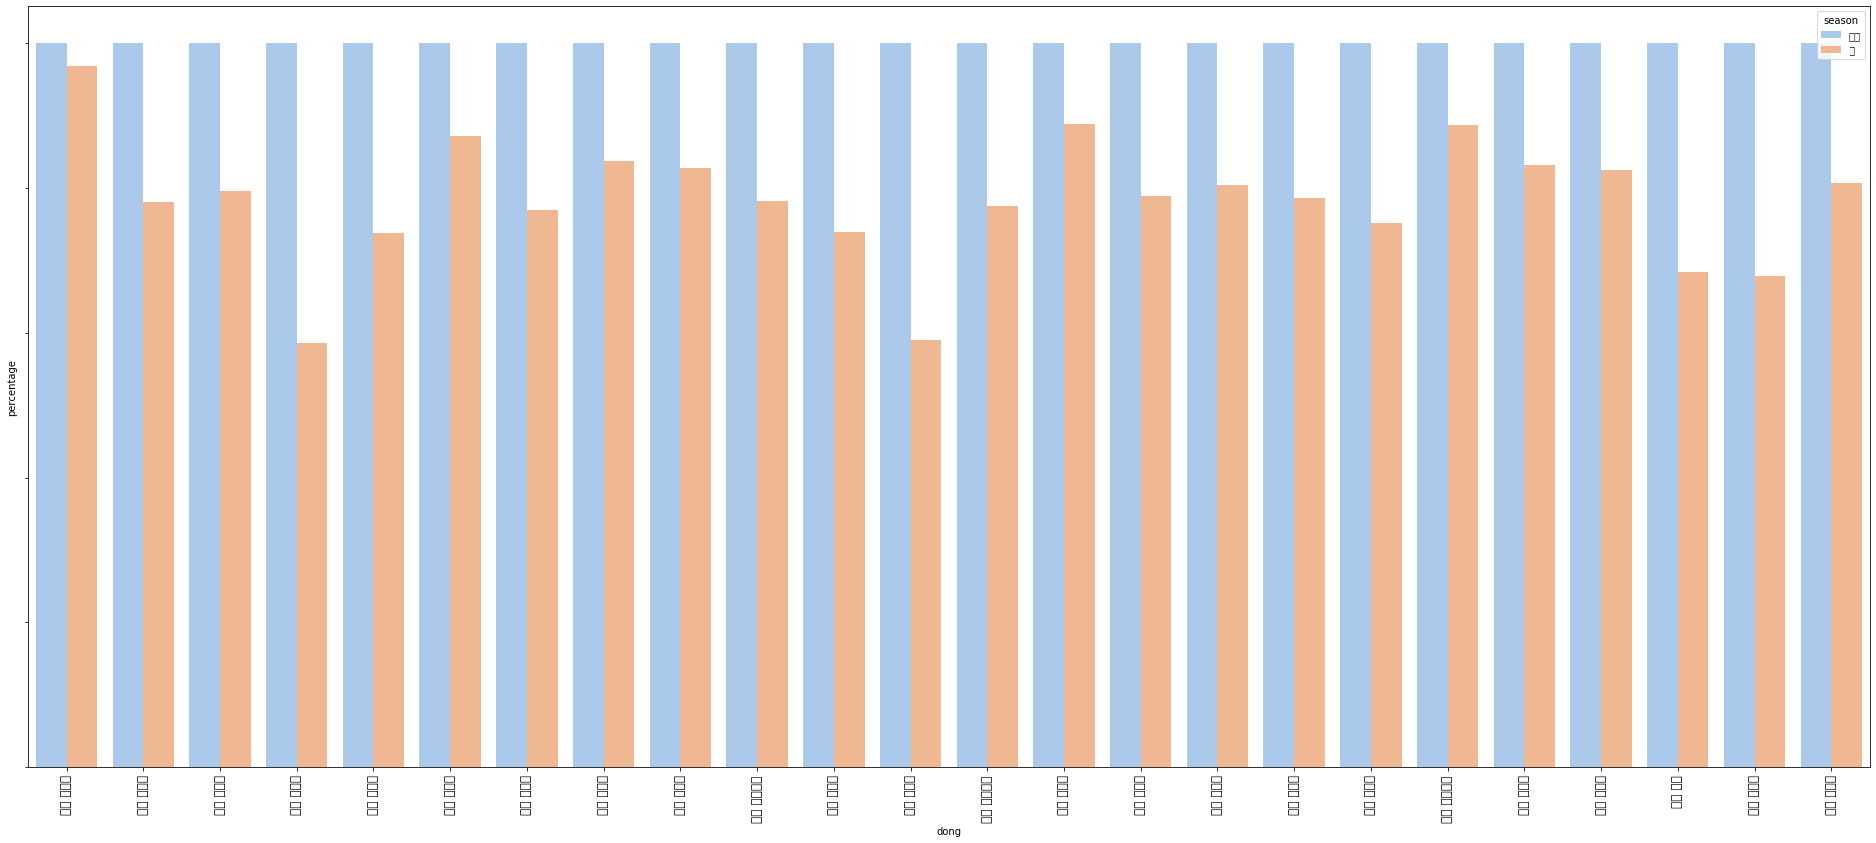

In [71]:
plt.figure(figsize=(33,14))
aaaa = sns.barplot( data = dong_season_mean,
    x = "dong",
    y = "percentage",
    hue = "season"
) 
plt.xticks(rotation=90)
aaaa.set_yticklabels(aaaa.get_ymajorticklabels(), fontsize = 12)
aaaa.set_xticklabels(aaaa.get_xmajorticklabels(), fontsize = 12)
plt.savefig('ddd.jpg', bbox_inches='tight')

# 주민등록상인구, 유동인구 분석

### 주민등록상 인구 데이터 전처리

In [116]:
resident_registration_population = pd.read_csv("2020_1.csv", sep="\t")

In [117]:
resident_registration_population.drop(columns = ["인구.1", "인구.2", "인구.4", "인구.5", "인구.7", "인구.8"], inplace = True)
resident_registration_population.drop(index = [0,1,2], inplace = True)

In [118]:
resident_registration_population = resident_registration_population.reset_index(drop= True)

In [121]:
resident_registration_population = resident_registration_population.rename(columns={resident_registration_population.columns[4]:"한국인"})
resident_registration_population = resident_registration_population.rename(columns={resident_registration_population.columns[5]:"등록외국인"})

In [122]:
re_po = resident_registration_population.sort_values(by="인구", ascending=False)

In [123]:
re_po = re_po.reset_index(drop=True)
re_po

,기간,자치구,세대,인구,한국인,등록외국인,세대당인구,65세이상고령자
0,2020.1/4,송파구,"279,301","680,883","674,095","6,788",2.41,"89,539"
1,2020.1/4,강서구,"263,645","595,703","589,302","6,401",2.24,"85,992"
2,2020.1/4,강남구,"233,624","549,898","544,804","5,094",2.33,"72,602"
3,2020.1/4,노원구,"217,148","535,495","531,037","4,458",2.45,"82,682"
4,2020.1/4,관악구,"270,760","516,662","499,374","17,288",1.84,"76,664"
5,2020.1/4,은평구,"208,209","482,509","478,019","4,490",2.3,"82,245"
6,2020.1/4,양천구,"177,436","460,532","456,339","4,193",2.57,"62,761"
7,2020.1/4,강동구,"190,019","457,042","452,646","4,396",2.38,"66,401"
8,2020.1/4,성북구,"193,801","454,532","442,494","12,038",2.28,"72,172"
9,2020.1/4,구로구,"177,275","438,308","405,837","32,471",2.29,"67,432"


In [ ]:
re_po.to_csv("re_po.csv", index = False) 

## 주민등록상인구 및 유동인구 비교분석

### 주민등록상 인구 활용

In [260]:
# 주민등록상 인구
dt_re = pd.read_csv("re_po.csv")

In [261]:
re_dt = dt_re.copy()
re_dt

,기간,자치구,세대,인구,한국인,등록외국인,세대당인구,65세이상고령자
0,2020.1/4,송파구,"279,301","680,883","674,095","6,788",2.41,"89,539"
1,2020.1/4,강서구,"263,645","595,703","589,302","6,401",2.24,"85,992"
2,2020.1/4,강남구,"233,624","549,898","544,804","5,094",2.33,"72,602"
3,2020.1/4,노원구,"217,148","535,495","531,037","4,458",2.45,"82,682"
4,2020.1/4,관악구,"270,760","516,662","499,374","17,288",1.84,"76,664"
5,2020.1/4,은평구,"208,209","482,509","478,019","4,490",2.30,"82,245"
6,2020.1/4,양천구,"177,436","460,532","456,339","4,193",2.57,"62,761"
7,2020.1/4,강동구,"190,019","457,042","452,646","4,396",2.38,"66,401"
8,2020.1/4,성북구,"193,801","454,532","442,494","12,038",2.28,"72,172"
9,2020.1/4,구로구,"177,275","438,308","405,837","32,471",2.29,"67,432"


In [262]:
re_dt = re_dt.loc[:,["자치구", "인구"]]

In [263]:
re_dt = re_dt.sort_values(by = "자치구")

In [264]:
re_dt.reset_index(inplace=True)

In [265]:
re_dt.drop("index", axis=1, inplace=True)

## 유동인구
##### 출처 : skt 유동인구데이터, 그래프로만 존재하여 하나씩 넣음

In [229]:
ppl.loc[0] = ["강남구", 982832, 961256, 813280, 643813, 884928, 851292, 854764, 651046,
            686836, 719418]

In [230]:
ppl.loc[1] = ["강동구", 262758, 257125, 230145, 163167, 245406, 222867, 203830, 176994, 183270, 189728]

In [231]:
ppl.loc[2] = ["강북구", 186416, 184071, 164190, 128920, 177466, 165782, 153925, 135954, 141942,147317]

In [232]:
ppl.loc[3] = ["강서구", 362553, 357037, 322453, 242029, 344350, 307263, 288612, 252589, 264154, 272142]

In [233]:
ppl.loc[4] = ["관악구", 307044, 302265, 257629, 316307, 282377, 259072, 232193, 198887, 208682, 217352]

In [234]:
ppl.loc[5] = ["광진구", 258948, 248225, 224544, 169508, 239991, 232567, 213105, 185159, 187640, 194983]

In [235]:
ppl.loc[6] = ["구로구", 378136, 367413, 321347, 240822, 350107, 321468,
              298436, 246498, 263004, 276333]

In [236]:
ppl.loc[7] = ["금천구", 312759, 309986, 280919, 211995, 296643, 246768, 248734,
              208573, 218039, 223610]

In [237]:
ppl.loc[8] = ["노원구", 298653, 288217, 257487, 191808, 279709, 257069, 229761, 203117, 216310, 227366]

In [238]:
ppl.loc[9] = ["동대문구", 269590, 257760, 230670, 180612, 248822, 235878, 216128, 186908, 195815, 205195]

In [239]:
ppl.loc[10] =  ["동작구", 303169, 287755, 242060, 177469, 271424, 262235, 228241, 190754, 199356, 214362]

In [240]:
ppl.loc[11] = ["마포구", 421522, 415434, 360573, 291452, 389668, 390472, 378203, 303517, 314417, 301695]

In [241]:
ppl.loc[12] = ["서대문구", 280172, 265729, 225110, 175725, 244502,
              245837, 220369, 182151, 191807, 193164]

In [242]:
ppl.loc[13] =["서초구", 648029, 618685, 539118, 408442, 586730,
             555042, 518548, 416841, 440241, 466603]

In [243]:
ppl.loc[14] = ["성동구", 301354, 295292, 269154, 202406, 282046,
              246042, 234213, 207617, 214935, 222144]

In [244]:
ppl.loc[15] = ["성북구", 291972, 282662, 249598, 192560, 273812,
              248737, 230914, 202929, 210895, 224466]

In [245]:
ppl.loc[16] = ["송파구", 513447, 486557, 430150, 311327, 464767,
              435521, 395785, 328363, 343696, 362962]

In [246]:
ppl.loc[17] = ["양천구", 294388, 285769, 249440, 187477, 272741,
             249765, 235827, 197482, 209387, 217614]

In [247]:
ppl.loc[18] = ["영등포구", 583933, 571829, 501103, 380004, 547819,
              492562, 476712, 385315, 400968, 419821]

In [248]:
ppl.loc[19] = ["용산구", 280830, 269056, 227204, 178341, 242783,
              256664, 237407, 189199, 191039, 188928]

In [249]:
ppl.loc[20] = ["은평구", 240672, 232747, 208016, 149284, 228318,
              168665, 172978, 158313, 168616, 170924]

In [250]:
ppl.loc[21] = ["종로구", 463370, 446827, 377301, 313307, 420866,
              427496, 385997, 295992, 306794, 333853]

In [251]:
ppl.loc[22] = ["중구", 452030, 439471, 336582, 345130, 364351,
              452030,439471, 336582, 345130, 364351]

In [252]:
ppl.loc[23] = ["중랑구", 184474, 169324, 152175, 157936, 165045,
              184474, 169324, 152675, 157936, 165045]

In [253]:
ppl_1 = ppl.iloc[:,[0,1,2,3,4,6,7,8,9]]

In [254]:
# 일별 평균 인구 
ppl_1["01"] = (ppl_1["01주중"]*5+ppl_1["01주말"]*2)/7
ppl_1["02"] = (ppl_1["02주중"]*5+ppl_1["02주말"]*2)/7
ppl_1["03"] = (ppl_1["03주중"]*5+ppl_1["03주말"]*2)/7
ppl_1["04"] = (ppl_1["04주중"]*5+ppl_1["04주말"]*2)/7

In [255]:
ppl_2 = ppl_1.iloc[:,[0,9,10,11,12]]

In [256]:
# 각 월별 일 평균 = 유동인구의 0102합, 0304합 /2
ppl_3 = pd.DataFrame()
ppl_3["city"] = ppl_2["city"]
ppl_3["0102"] = (ppl_2["01"]+ppl_2["02"])/2
ppl_3["0304"] = (ppl_2["03"]+ppl_2["04"])/2

In [257]:
ppl_3["percentage"] = ppl_3["0304"]/ppl_3["0102"] *100

In [258]:
ppl_3

,city,0102,0304,percentage
0,강남구,938039,711516,75.8514
1,강동구,246629,191935,77.8232
2,강북구,177989,144382,81.1182
3,강서구,342121,275421,80.5039
4,관악구,287791,263201,91.4557
5,광진구,244801,193990,79.244
6,구로구,354825,273561,77.0973
7,금천구,293195,236985,80.8286
8,노원구,279144,220381,78.9489
9,동대문구,252912,201561,79.6963


In [267]:
re_dt.drop(9, axis=0, inplace=True)

In [268]:
re_dt.reset_index(inplace=True, drop=True)

In [269]:
re_dt["0102유동"] = list(ppl_3["0102"])

In [270]:
re_dt["인구"] = re_dt["인구"].apply(lambda x : x.replace(",",""))

In [271]:
re_dt["인구"] = re_dt["인구"].astype("int")

In [272]:
re_dt["상주대비유동"] = (re_dt["0102유동"]/re_dt["인구"])*100

In [273]:
re_dt["유동1년평균"] = [909769, 254061, 185156, 349264, 297636, 255300, 365397, 298203, 297502, 263310, 
                     289099, 405334, 270101, 603301, 291273, 292444, 486933, 282589, 556013,264592, 
                     235414, 437932, 517820, 211455]

In [274]:
re_dt["1년평균상주대비유동"] = re_dt["유동1년평균"] / re_dt["인구"] *100 

In [275]:
re_dt.sort_values(by="1년평균상주대비유동") 

,자치구,인구,0102유동,상주대비유동,유동1년평균,1년평균상주대비유동
20,은평구,482509,217884.357143,45.156537,235414,48.789556
23,중랑구,400678,176899.000000,44.149916,211455,52.774298
8,노원구,535495,279143.571429,52.128138,297502,55.556448
1,강동구,457042,246629.214286,53.962046,254061,55.588108
4,관악구,516662,287791.071429,55.702001,297636,57.607488
2,강북구,316750,177989.214286,56.192333,185156,58.454933
3,강서구,595703,342121.428571,57.431544,349264,58.630559
17,양천구,460532,276569.214286,60.054288,282589,61.361425
15,성북구,454532,273748.000000,60.226343,292444,64.339584
5,광진구,365990,244800.642857,66.887249,255300,69.756004


In [276]:
re_dt["0304유동"] = list(ppl_3["0304"])
re_dt["0304상주대비유동"] = (re_dt["0304유동"]/re_dt["인구"])*100

In [277]:
re_dt.sort_values(by="0304유동")

,자치구,인구,0102유동,상주대비유동,유동1년평균,1년평균상주대비유동,0304유동,0304상주대비유동
2,강북구,316750,177989.214286,56.192333,185156,58.454933,144381.571429,45.582185
23,중랑구,400678,176899.000000,44.149916,211455,52.774298,155126.928571,38.716108
20,은평구,482509,217884.357143,45.156537,235414,48.789556,174311.285714,36.126017
1,강동구,457042,246629.214286,53.962046,254061,55.588108,191934.857143,41.995015
5,광진구,365990,244800.642857,66.887249,255300,69.756004,193989.857143,53.004141
12,서대문구,325875,261565.500000,80.265593,270101,82.884848,196577.928571,60.323108
19,용산구,246165,266969.428571,108.451416,264592,107.485630,199157.214286,80.903952
9,동대문구,362793,252911.571429,69.712363,263310,72.578578,201561.142857,55.558168
10,동작구,407802,281112.285714,68.933523,289099,70.892002,205561.785714,50.407253
17,양천구,460532,276569.214286,60.054288,282589,61.361425,214165.928571,46.504028


In [284]:
re_dt["주민등록인구수대비유동변화랑"] = list(map(lambda x,y : x-y,
                              list(re_dt["0304상주대비유동"]), list(re_dt["상주대비유동"])))

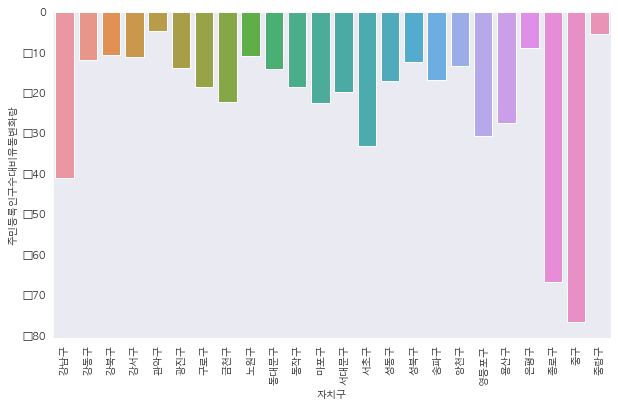

In [289]:
plt.figure(figsize=(10,6))
sns.barplot(data=re_dt, x="자치구", y="주민등록인구수대비유동변화랑")
plt.xticks(rotation=90)
plt.savefig("변화량")

In [279]:
rere = re_dt.sort_values(by="상주대비유동")
rere.to_csv("rere.csv")

In [ ]:
## 2020유동인구 감소율

In [280]:
de_mv = re_dt.copy()

In [281]:
de_mv["2020유동감소율"] = de_mv["0304유동"]/de_mv["0102유동"]*100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

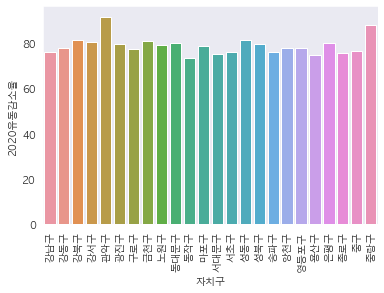

In [283]:
sns.barplot(data=de_mv, x="자치구", y="2020유동감소율")
plt.xticks(rotation=90)

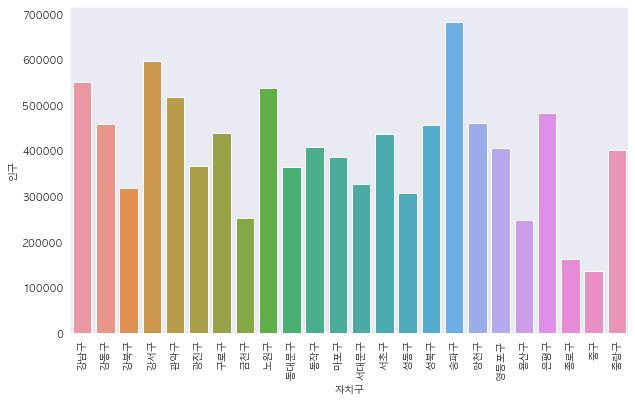

In [290]:
plt.figure(figsize=(10,6))
sns.barplot(data=re_dt, x="자치구", y="인구")
plt.xticks(rotation=90)
plt.savefig("상주인구")

# 관광객 인구 통계

In [126]:
seoul_t_p = pd.read_csv("seoul_t_p.csv", sep="\t")

In [127]:
seoul_t_p

,기간,구분,집계관광지수,합계,유료관광지,유료관광지.1,유료관광지.2,무료관광지,무료관광지.1,무료관광지.2,비고
0,기간,구분,집계관광지수,합계,소계,내국인,외국인,소계,내국인,외국인,비고
1,2019,합계,19,"28,172,637","24,845,239","21,859,136","2,986,103","3,327,398","3,124,184","203,214",-
2,2019,종로구,4,"8,456,526","8,456,526","6,283,496","2,173,030",-,-,-,경복궁종묘창경궁창덕궁
3,2019,중구,3,"5,740,994","2,413,596","2,044,800","368,796","3,327,398","3,124,184","203,214",덕수궁남산골한옥마을서울시립미술관본관
4,2019,용산구,1,"3,354,089","3,354,089","3,215,625","138,464",-,-,-,국립중앙박물관
5,2019,동대문구,2,"86,738","86,738","82,735","4,003",-,-,-,서울약령시한의약박물관세종대왕기념관
6,2019,노원구,1,"98,354","98,354","97,811",543,-,-,-,태릉·강릉·조선왕릉전시관
7,2019,서대문구,2,"1,289,720","1,289,720","1,254,098","35,622",-,-,-,서대문자연사박물관서대문형무소역사관
8,2019,마포구,1,"290,752","290,752","47,276","243,476",-,-,-,트릭아이미술관
9,2019,서초구,1,"49,303","49,303","49,162",141,-,-,-,헌릉·인릉


In [128]:
seoul_t_p.rename(columns = {"유료관광지.1":"유료_내국인"}, inplace = True)
seoul_t_p.rename(columns = {"유료관광지.2":"유료_외국인"}, inplace = True)
seoul_t_p.rename(columns = {"무료관광지.1":"무료_내국인"}, inplace = True)
seoul_t_p.rename(columns = {"무료관광지.2":"무료_외국인"}, inplace = True)

In [129]:
seoul_t_p.drop(index = 0, inplace = True)

In [130]:
seoul_t_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      11 non-null     object
 1   구분      11 non-null     object
 2   집계관광지수  11 non-null     object
 3   합계      11 non-null     object
 4   유료관광지   11 non-null     object
 5   유료_내국인  11 non-null     object
 6   유료_외국인  11 non-null     object
 7   무료관광지   11 non-null     object
 8   무료_내국인  11 non-null     object
 9   무료_외국인  11 non-null     object
 10  비고      11 non-null     object
dtypes: object(11)
memory usage: 1.0+ KB


In [131]:
seoul_t_p = seoul_t_p.replace("-", "0")

In [132]:
seoul_t_p["유료_내국인"] = list(map(lambda x: x.replace(",", ""), list(seoul_t_p["유료_내국인"])))

In [133]:
seoul_t_p["유료_내국인"] = seoul_t_p["유료_내국인"].astype("int")

In [134]:
seoul_t_p["유료_외국인"] = list(map(lambda x: x.replace(",", ""), list(seoul_t_p["유료_외국인"])))
seoul_t_p["유료_외국인"] = seoul_t_p["유료_외국인"].astype("int")

In [135]:
seoul_t_p["무료_내국인"] = list(map(lambda x: x.replace(",", ""), list(seoul_t_p["무료_내국인"])))
seoul_t_p["무료_내국인"] = seoul_t_p["무료_내국인"].astype("int")

In [136]:
seoul_t_p["무료_외국인"] = list(map(lambda x: x.replace(",", ""), list(seoul_t_p["무료_외국인"])))
seoul_t_p["무료_외국인"] = seoul_t_p["무료_외국인"].astype("int")

In [137]:
seoul_t_p.iloc[3,5]

3215625

In [138]:
a = seoul_t_p.iloc[2,5]+seoul_t_p.iloc[2,8]

In [139]:
b = seoul_t_p.iloc[2,6]+seoul_t_p.iloc[2,9]

In [140]:
seoul_t_p["유료_내국인"].loc[3] = a

In [141]:
seoul_t_p["유료_외국인"].loc[3] = b

In [142]:
seoul_t_p = seoul_t_p.drop(columns = ["무료관광지", "무료_내국인", "무료_외국인"])

In [143]:
seoul_t_p.rename(columns = {"합계":"관광지합계"}, inplace = True)
seoul_t_p.rename(columns = {"유료_내국인":"내국인"}, inplace = True)
seoul_t_p.rename(columns = {"유료_외국인":"외국인"}, inplace = True)
seoul_t_p = seoul_t_p.drop(columns = "유료관광지")

In [144]:
seoul_t_p["관광지합계"] = list(map(lambda x: x.replace(",", ""), list(seoul_t_p["관광지합계"])))
seoul_t_p["관광지합계"] = seoul_t_p["관광지합계"].astype("int")

In [145]:
seoul_t_p.drop(index = 1, inplace = True)

In [146]:
seoul_t_p["관광객합계"] = seoul_t_p["내국인"] + seoul_t_p["외국인"]

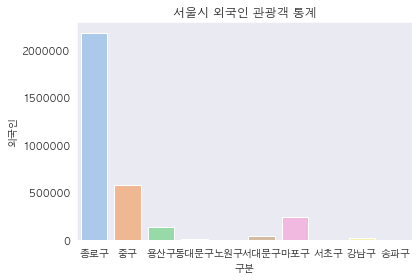

In [148]:
sns.set_palette("pastel")
sns.barplot(data=seoul_t_p, x="구분", y="외국인").set_title("서울시 외국인 관광객 통계")
plt.savefig('서울시 외국인 관광객 통계.jpg', bbox_inches='tight')
plt.show()

# 유동인구 대비 상주인구 및 매출 변화량과 비교

In [306]:
season_origin = pd.read_csv("dt_sea_region")

In [307]:
winter_idx = season_origin[season_origin["season"]=="겨울"].index
spring_idx = season_origin[season_origin["season"]=="봄"].index

In [308]:
winter_ls = (season_origin.loc[winter_idx]["amount"])
spring_ls = (season_origin.loc[spring_idx]["amount"])

In [309]:
spring_per_origin = list(map(lambda x,y : x/y*100, spring_ls,winter_ls))

In [310]:
spring_per_origin = list(map(lambda x : round(x,2), spring_per_origin))

In [311]:
spring_per_post  = list(dong_season_mean[dong_season_mean["season"]=="봄"]['percentage'])

In [312]:
region_idx = season_origin["region"].unique()

In [313]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
plt.rcParams['font.family'] = 'AppleGothic'

In [314]:
spring_change = pd.read_csv("spring_change.csv")

In [315]:
f_ppl = pd.DataFrame()

In [ ]:
gu_cgi_new = gu_cgi_new.drop("도봉구", axis=0)

In [301]:
cgi_chage = list(gu_cgi_new["19to20"])

In [302]:
spring_change.index = ['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
                       '서울 구로구', '서울 금천구', '서울 노원구', '서울 동대문구', '서울 동작구', '서울 마포구',
                       '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구', '서울 양천구',
                       '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구', '서울 중랑구']

In [303]:
spring_change.reset_index(inplace=True)

In [ ]:
spring_change.sort_values("19to20spring")

In [305]:
spring_change.sort_values("chage_amount")

,index,Unnamed: 0,spring_per_origin,spring_per_post,change_per_point,chage_rate,19t020spring,chage_amount,total
8,서울 노원구,8,189.59,82.74,-106.85,93.693660,77.522135,-112.067865,55.556448
3,서울 강서구,3,167.34,58.61,-108.73,95.550376,56.002075,-111.337925,58.630559
20,서울 은평구,20,183.67,82.36,6.69,99.759446,82.161880,-109.416342,48.789556
14,서울 성동구,14,187.32,78.88,-108.44,100.584604,79.341135,-107.978865,94.817590
17,서울 양천구,17,168.09,75.16,-92.93,97.014776,72.916306,-95.173694,61.361425
2,서울 강북구,2,165.58,79.49,-86.09,98.408782,78.225141,-87.354859,58.454933
6,서울 구로구,6,139.63,76.91,-62.72,94.071003,72.350008,-67.279992,83.365350
11,서울 마포구,11,120.93,58.94,-61.99,98.504202,58.058377,-62.871623,104.985418
21,서울 종로구,21,1431.93,68.39,-13.54,97.039270,66.365157,-59.416342,270.355097
9,서울 동대문구,9,133.85,78.20,-55.65,97.338880,76.119004,-57.730996,72.578578


In [91]:
dtdt = spring_change.sort_values("chage_amount") 

In [92]:
dtdt.reset_index(inplace=True)
dtdt["chage_amount"] = -dtdt["chage_amount"]

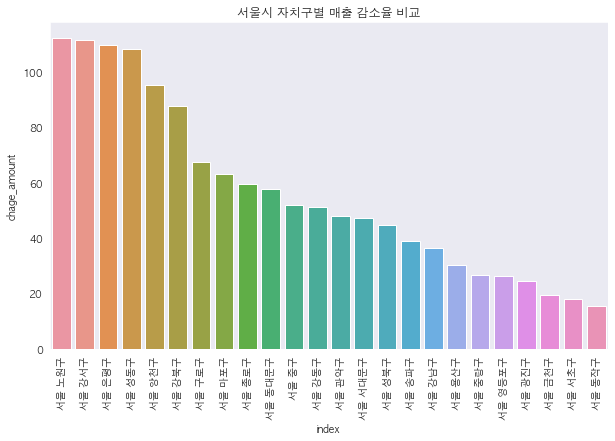

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(data = dtdt, x="index", y="chage_amount").set_title("서울시 자치구별 매출 감소율 비교")
plt.xticks(rotation=90) 
plt.savefig('서울시 자치구별 매출 감소율 비교.jpg', bbox_inches='tight')

In [94]:
rere = pd.read_csv("rere.csv")

In [95]:
rere = rere.sort_values(by="자치구").drop("Unnamed: 0", axis=1).reset_index(drop=True)

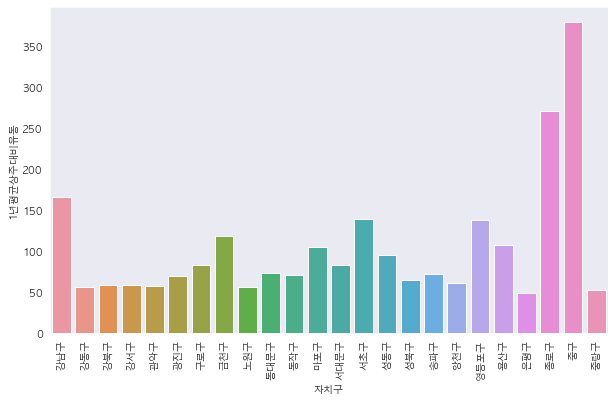

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(data=rere, x="자치구", y="1년평균상주대비유동")
plt.xticks(rotation=90)
plt.savefig('1년평균상주대비유동.jpg', bbox_inches='tight')

In [97]:
spring_change.index = range(0,24)

In [98]:
spring_change["city"] = list(rere["자치구"])

In [99]:
spring_change

,index,Unnamed: 0,spring_per_origin,spring_per_post,change_per_point,chage_rate,19t020spring,chage_amount,total,city
0,서울 강남구,0,123.84,96.81,-27.03,90.407718,87.523712,-36.316288,165.443228,강남구
1,서울 강동구,1,132.92,78.04,-54.88,104.794226,81.781414,-51.138586,55.588108,강동구
2,서울 강북구,2,165.58,79.49,-86.09,98.408782,78.225141,-87.354859,58.454933,강북구
3,서울 강서구,3,167.34,58.61,-108.73,95.550376,56.002075,-111.337925,58.630559,강서구
4,서울 관악구,4,111.49,73.73,-37.76,86.559389,63.820238,-47.669762,57.607488,관악구
5,서울 광진구,5,109.79,87.10,-22.69,98.024162,85.379045,-24.410955,69.756004,광진구
6,서울 구로구,6,139.63,76.91,-62.72,94.071003,72.350008,-67.279992,83.365350,구로구
7,서울 금천구,7,112.05,83.69,12.64,102.123271,85.466966,-19.416966,118.631102,금천구
8,서울 노원구,8,189.59,82.74,-106.85,93.693660,77.522135,-112.067865,55.556448,노원구
9,서울 동대문구,9,133.85,78.20,-55.65,97.338880,76.119004,-57.730996,72.578578,동대문구


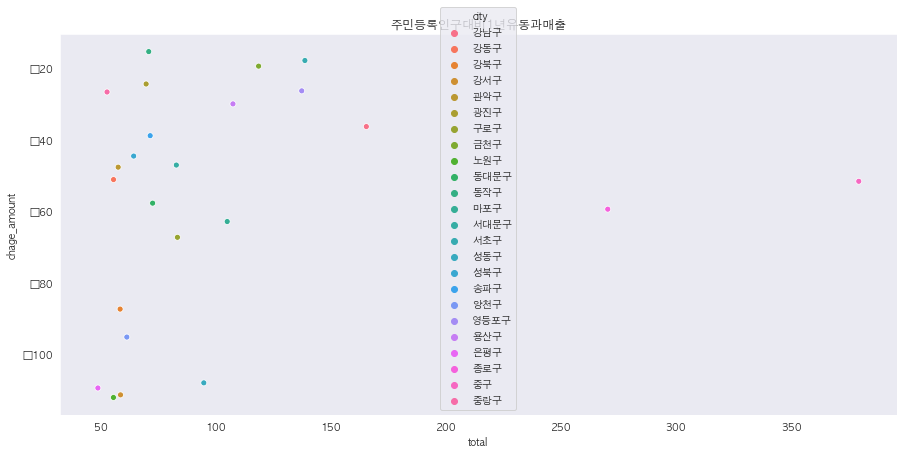

In [102]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=spring_change, x="total", y="chage_amount", hue="city").set_title("주민등록인구대비1년유동과매출")
plt.savefig('주민등록인구대비1년유동과매출.jpg', bbox_inches='tight')

In [103]:
spring_change["유동1년평균"] = rere["유동1년평균"]
spring_change["인구"] = rere["인구"]

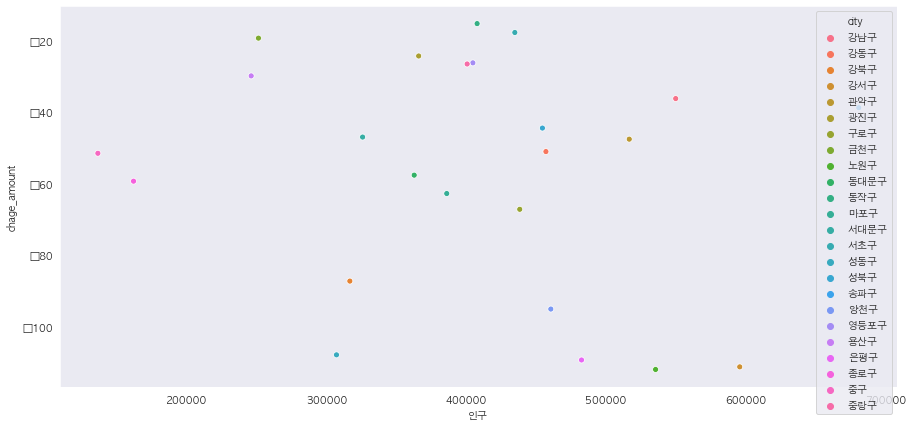

In [104]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=spring_change, x="인구", y="chage_amount", hue="city")
plt.savefig('인구.jpg', bbox_inches='tight')

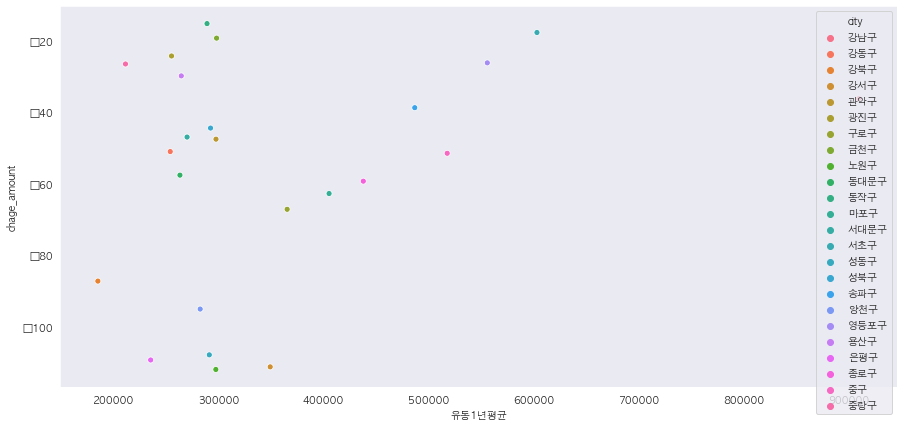

In [105]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=spring_change, x="유동1년평균", y="chage_amount", hue="city")
plt.savefig('유동1년평균.jpg', bbox_inches='tight')